In [7]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# import library to set up the folder path
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path = '/content/drive/MyDrive/CesarIvan/UNI-A/02_RESEARCH/ARTICLES/2025/MOROCCO_ICARDA/MSC THESIS/01_DATA/MOROCCO.csv'
df = pd.read_csv(file_path, encoding='latin1')
df.head()

,EDUC_LEVEL,FAM_NO,AREA,WT_CROP,WT_IR_YN,WT_WA_CN_YN,WT_WA_RC,WT_GW,WT_PS,WT_SY_YN,WT_CR_YL_KG,WT_VL_CC,WT_SM_ST,WT_CP_NI_MN,SM_CROP,SM_IR_YN,SM_IR_WA_Y,SM_IR_TC,SM_GW,SM_PS,SM_CR_YL_KG,SM_CP_NI_MN,SM_VL_CC,SM_SM_ST,SM_RAIN_YN,CSM_AGR_YN,FL_USE,CR_RT_YN,SOIL_PROB,CA_YN,CA_CNS,CA_US_YN,CA_SS,CA_US_DT,CA_CC_VUL,CA_CC_RISK,CA_CC_ADAP,CA_CC_IMP,CA_CC_SS,NDVI_CV,PRECIPITAT,TEMPERATUR
0,secondary,2,2,Wheat,no,yes,Low,30,Aphids (Pest),No,40,Medium vulnerable,Low,8000,Peanut,Yes,Based on experience,Yes,30,...,8,15000,Medium vulnerable,Dry,No,Yes,Selling in the market,Yes,Nothing,Yes(Rarely),Lack of machinery,Yes,Winter,Often,Medium vulnerable,Drought,Crop diversification,Water stress,Through apps,19.108101,113.268189,1.781563
1,postgraduate,3,2,Wheat,no,no,Low,120,Armyworms (Pest),Yes,5000,Highly vulnerable,Medium,7000,Maize,Yes,Based on experience,Yes,120,"Ver blanc (hanneton sp.), helminthosporiose",15000,4500,Medium vulnerable,Low,No,No,Subsistence/domestic use,Yes,Salinity,Yes(Rarely),Lack of machinery,Maybe,Winter,Never,highly vulnerable,Drought,Drought-resistant varieties,Lower yield,From mosque,36.353932,92.524509,2.182102
2,no-schooling,4,15,Wheat,yes,no,Medium,76,Cutworms (Pest),Yes,2400,Medium vulnerable,Dry,6800,Maize,Yes,Based on experience,No,76,Helminthosporium turcicum,5000,9100,Medium vulnerable,Dry,No,No,Selling in the market,No,Salinity,No,Lack of machinery,No idea,Winter,Never,Not aware,Drought,Improving irrigation practices,Water stress,Through apps,33.571195,115.796712,1.860574
3,no-schooling,9,15,Wheat,yes,no,Medium,120,Chickweed (Weed),No,3000,Medium vulnerable,Medium,24000,Maize,Yes,Based on experience,No,120,Fall Armyworm (Spodoptera frugiperda),14000,14000,Medium vulnerable,Dry,No,No,Selling in the market,Yes,Salinity,No,Lack of machinery,Maybe,Summer,Never,Medium vulnerable,Strong winds,Improving irrigation practices,Dust,From mosque,17.413035,113.048130,1.339540
4,primary,6,10,Wheat,yes,yes,Medium,100,Chickweed (Weed),No,25000,Medium vulnerable,Medium,9300,Maize,Yes,Based on experience,Yes,90,Nematodes,14000,14000,Medium vulnerable,Dry,No,No,Subsistence/domestic use,Yes,Erosion,No,Lack of knowledge,Maybe,Summer,Never,Medium vulnerable,Heatwaves,Improving irrigation practices,Dust,From mosque,18.902307,83.016815,2.334760


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDUC_LEVEL   3589 non-null   object 
 1   FAM_NO       3589 non-null   int64  
 2   AREA         3589 non-null   int64  
 3   WT_CROP      3589 non-null   object 
 4   WT_IR_YN     3589 non-null   object 
 5   WT_WA_CN_YN  3589 non-null   object 
 6   WT_WA_RC     3589 non-null   object 
 7   WT_GW        3589 non-null   int64  
 8   WT_PS        3589 non-null   object 
 9   WT_SY_YN     3589 non-null   object 
 10  WT_CR_YL_KG  3589 non-null   int64  
 11  WT_VL_CC     3589 non-null   object 
 12  WT_SM_ST     3589 non-null   object 
 13  WT_CP_NI_MN  3589 non-null   int64  
 14  SM_CROP      3589 non-null   object 
 15  SM_IR_YN     3589 non-null   object 
 16  SM_IR_WA_Y   3584 non-null   object 
 17  SM_IR_TC     3589 non-null   object 
 18  SM_GW        3589 non-null   int64  
 19  SM_PS 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FAM_NO,3589.0,4.849262,10.586737,0.000000,3.000000,4.000000,6.000000,6.000000e+02
AREA,3589.0,6.047088,5.683276,1.000000,2.000000,3.000000,10.000000,2.000000e+01
WT_GW,3589.0,100.817498,75.106594,3.000000,85.000000,90.000000,100.000000,3.715000e+03
WT_CR_YL_KG,3589.0,2663.816941,3205.466542,40.000000,1200.000000,2000.000000,3000.000000,7.000000e+04
WT_CP_NI_MN,3589.0,28854.424909,153364.364504,400.000000,7160.000000,14000.000000,19000.000000,2.782500e+06
SM_GW,3589.0,102.735024,67.215466,5.000000,85.000000,90.000000,100.000000,1.500000e+03
SM_CR_YL_KG,3589.0,5297.239621,11602.465329,6.000000,1500.000000,2500.000000,4000.000000,4.200000e+05
SM_CP_NI_MN,3589.0,82861.251045,257379.559503,52.000000,7500.000000,13000.000000,21500.000000,1.260000e+06
NDVI_CV,3589.0,38.373680,11.978056,3.736624,29.412266,39.753814,47.096653,7.903986e+01
PRECIPITAT,3548.0,108.692529,19.461684,69.777589,99.877487,107.750139,113.160330,2.673810e+02


In [12]:
def standardized_crosstab_plot(df, category_x, category_hue):
    """
    Standardizes and visualizes the crosstab and count distribution
    of categorical variables in a dataset.

    Parameters:
    - df: pandas DataFrame containing the data.
    - category_x: Column name for the x-axis category (e.g., 'CA_CC_VUL').
    - category_hue: Column name for the hue category (e.g., 'EDUC_LEVEL').

    Returns:
    - Crosstab DataFrame with standardized percentages.
    - Displays a countplot visualization.
    """

    # Ensure categories are strings for consistency
    df[category_x] = df[category_x].astype(str)
    df[category_hue] = df[category_hue].astype(str)

    # Generate the standardized crosstab
    tab = pd.crosstab(df[category_x], df[category_hue], margins=True, normalize='index').round(4) * 100
    print("\nStandardized Crosstab:\n", tab)

    # Plot the standardized countplot
    plt.figure(figsize=(20, 5))
    sns.countplot(data=df, x=category_x, hue=category_hue)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {category_hue} across {category_x}")
    plt.show()

    return tab


Standardized Crosstab:
 CA_CC_VUL     Low vulnerable  Medium vulnerable  Not aware  highly vulnerable
EDUC_LEVEL                                                                   
no-schooling            0.47              83.03       0.09              16.40
postgraduate            0.00              33.33       0.00              66.67
primary                 0.62              74.15       0.08              25.15
secondary               0.00              48.38       0.10              51.52
university              0.00              46.46       0.00              53.54
All                     0.36              67.82       0.08              31.74


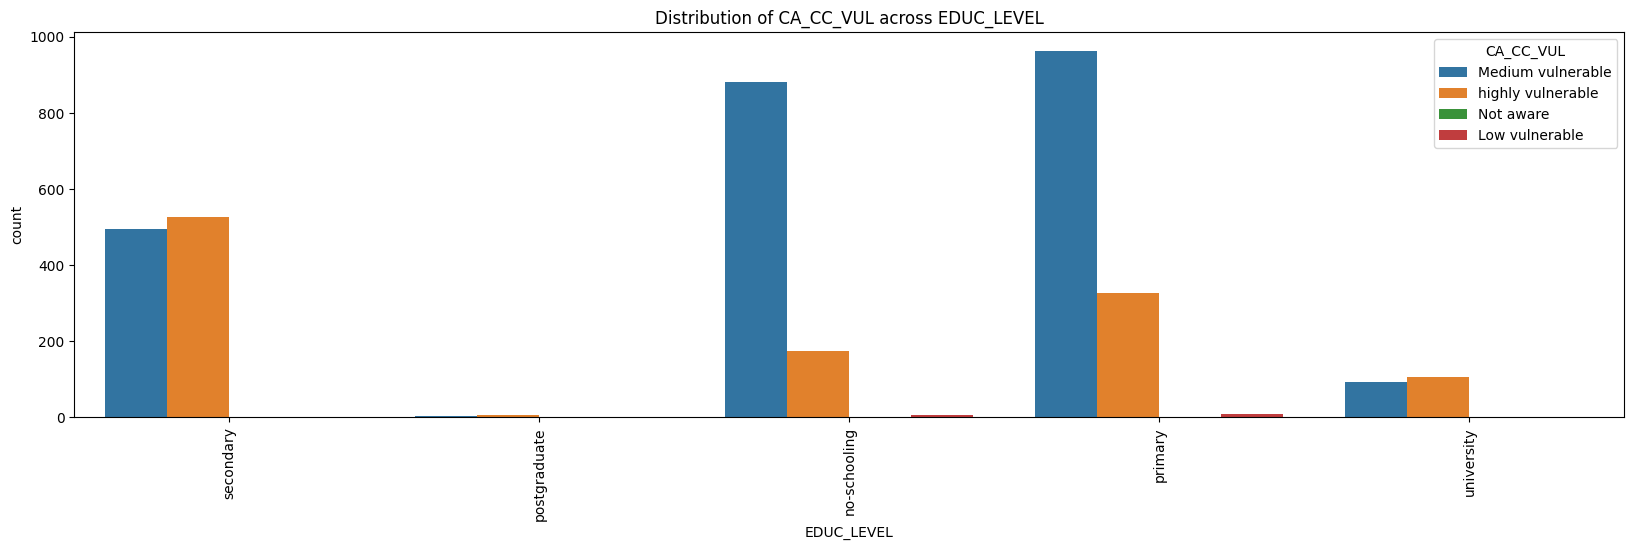

CA_CC_VUL,Low vulnerable,Medium vulnerable,Not aware,highly vulnerable
EDUC_LEVEL,,,,
no-schooling,0.47,83.03,0.09,16.40
postgraduate,0.00,33.33,0.00,66.67
primary,0.62,74.15,0.08,25.15
secondary,0.00,48.38,0.10,51.52
university,0.00,46.46,0.00,53.54
All,0.36,67.82,0.08,31.74


In [13]:
standardized_crosstab_plot(df, 'EDUC_LEVEL','CA_CC_VUL')


Standardized Crosstab:
 CA_CC_VUL                 Low vulnerable  Medium vulnerable  Not aware  \
CA_CC_IMP                                                                
Dust                                0.54              75.30       0.07   
Increased pests/diseases            0.21              50.07       0.00   
Lower yield                         0.00              91.67       0.00   
Physical damage                     0.34              97.59       0.17   
Water stress                        0.00              11.94       1.49   
Wilting                             0.00             100.00       0.00   
All                                 0.36              67.82       0.08   

CA_CC_VUL                 highly vulnerable  
CA_CC_IMP                                    
Dust                                  24.10  
Increased pests/diseases              49.72  
Lower yield                            8.33  
Physical damage                        1.90  
Water stress                    

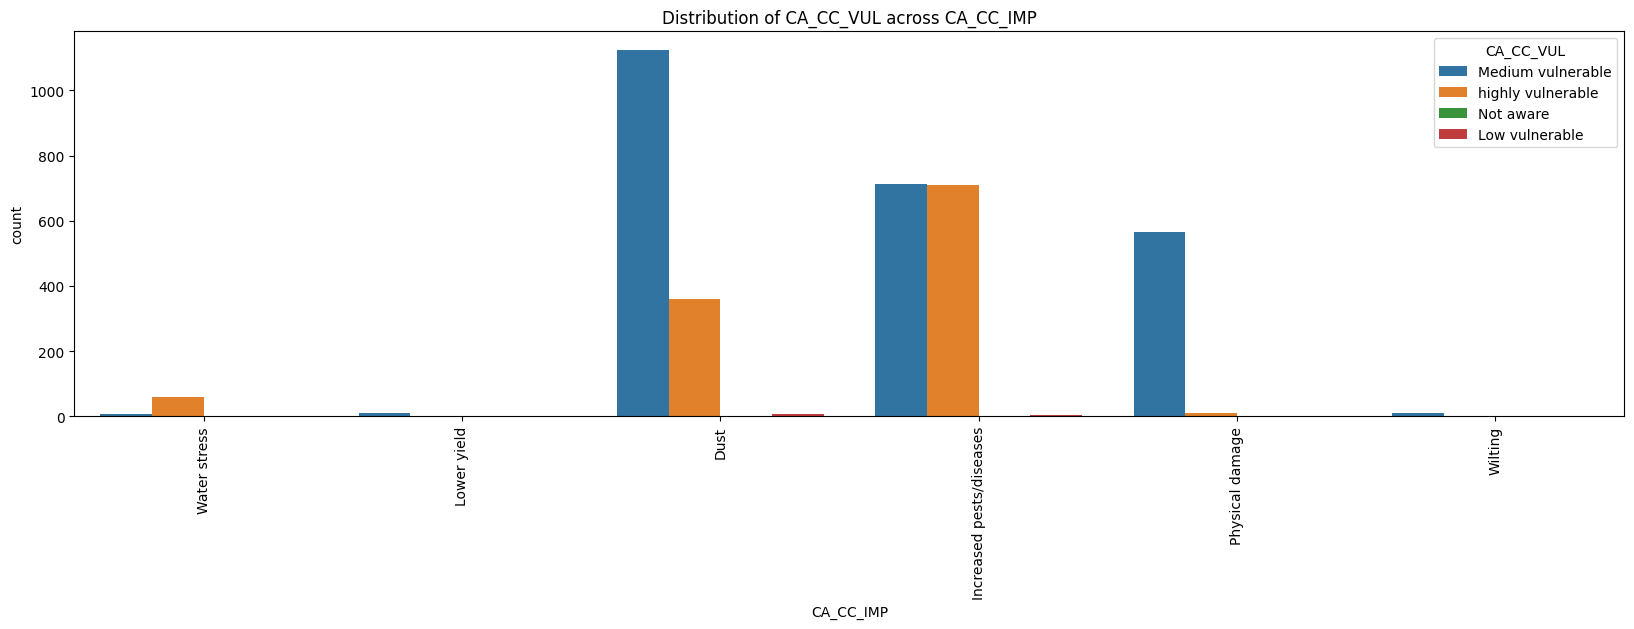

CA_CC_VUL,Low vulnerable,Medium vulnerable,Not aware,highly vulnerable
CA_CC_IMP,,,,
Dust,0.54,75.30,0.07,24.10
Increased pests/diseases,0.21,50.07,0.00,49.72
Lower yield,0.00,91.67,0.00,8.33
Physical damage,0.34,97.59,0.17,1.90
Water stress,0.00,11.94,1.49,86.57
Wilting,0.00,100.00,0.00,0.00
All,0.36,67.82,0.08,31.74


In [14]:
standardized_crosstab_plot(df, 'CA_CC_IMP','CA_CC_VUL')


Standardized Crosstab:
 CA_CC_ADAP    Adjusting sowing date  Crop diversification  \
EDUC_LEVEL                                                  
no-schooling                  47.31                  6.88   
postgraduate                   0.00                  0.00   
primary                        7.08                  8.00   
secondary                      1.86                  4.02   
university                     0.00                  0.00   
All                           17.08                  6.07   

CA_CC_ADAP    Drought-resistant varieties  Improving irrigation practices  \
EDUC_LEVEL                                                                  
no-schooling                        14.14                           31.57   
postgraduate                        11.11                           88.89   
primary                             19.38                           65.46   
secondary                           29.87                           64.25   
university              

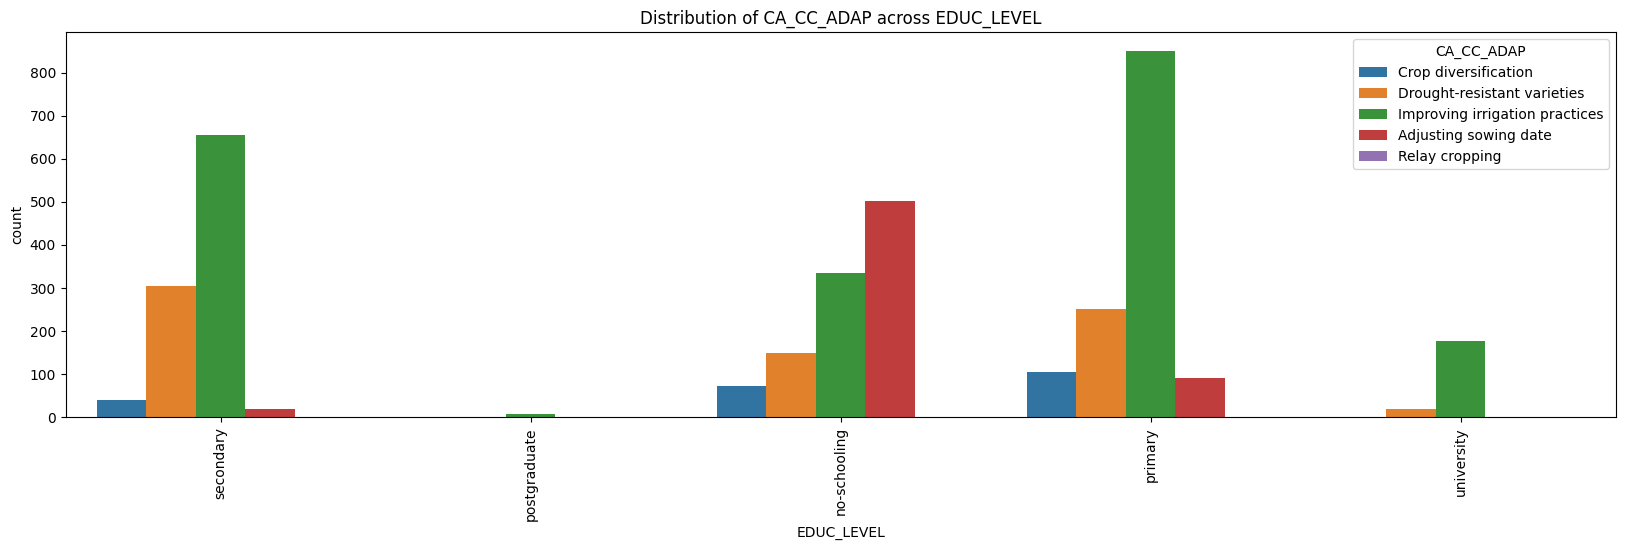

CA_CC_ADAP,Adjusting sowing date,Crop diversification,Drought-resistant varieties,Improving irrigation practices,Relay cropping
EDUC_LEVEL,,,,,
no-schooling,47.31,6.88,14.14,31.57,0.09
postgraduate,0.00,0.00,11.11,88.89,0.00
primary,7.08,8.00,19.38,65.46,0.08
secondary,1.86,4.02,29.87,64.25,0.00
university,0.00,0.00,10.10,89.90,0.00
All,17.08,6.07,20.28,56.51,0.06


In [15]:
standardized_crosstab_plot(df, 'EDUC_LEVEL','CA_CC_ADAP')


Standardized Crosstab:
 CA_CC_IMP                                    Dust  Increased pests/diseases  \
CA_CC_RISK                                                                    
Drought                                     50.53                     27.20   
Heatwaves                                    1.24                     96.90   
Pests and diseases (due to climate change)  62.50                     31.25   
Strong winds                                25.00                     16.67   
All                                         41.63                     39.73   

CA_CC_IMP                                   Lower yield  Physical damage  \
CA_CC_RISK                                                                 
Drought                                            0.41            19.42   
Heatwaves                                          0.00             1.08   
Pests and diseases (due to climate change)         0.00             6.25   
Strong winds                             

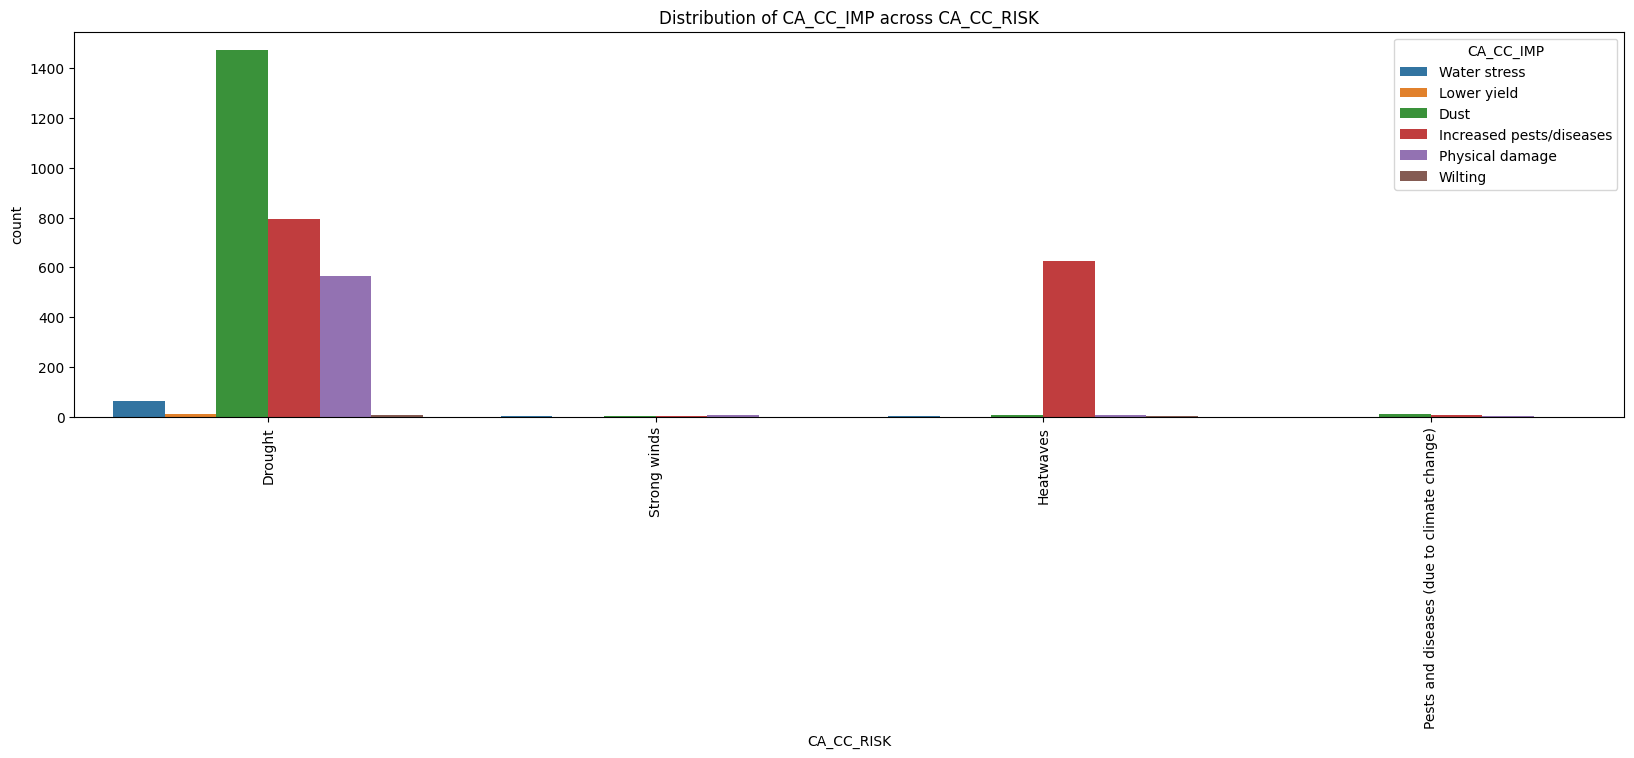

CA_CC_IMP,Dust,Increased pests/diseases,Lower yield,Physical damage,Water stress,Wilting
CA_CC_RISK,,,,,,
Drought,50.53,27.20,0.41,19.42,2.16,0.27
Heatwaves,1.24,96.90,0.00,1.08,0.46,0.31
Pests and diseases (due to climate change),62.50,31.25,0.00,6.25,0.00,0.00
Strong winds,25.00,16.67,0.00,50.00,8.33,0.00
All,41.63,39.73,0.33,16.16,1.87,0.28


In [16]:
standardized_crosstab_plot(df, 'CA_CC_RISK','CA_CC_IMP')


Standardized Crosstab:
 CA_CC_SS      Extension agents  From mosque  Newspaper  Radio     TV  \
EDUC_LEVEL                                                             
no-schooling             28.84         9.33       2.83  28.37  30.25   
postgraduate              0.00        11.11       0.00   0.00   0.00   
primary                  21.54        11.92       7.62   8.54  38.46   
secondary                 6.46         1.47       1.86   4.60  10.68   
university                2.02         0.00       0.51   2.02   5.05   
All                      18.28         7.52       4.15  12.90  26.19   

CA_CC_SS      Through apps  
EDUC_LEVEL                  
no-schooling          0.38  
postgraduate         88.89  
primary              11.92  
secondary            74.93  
university           90.40  
All                  30.96  


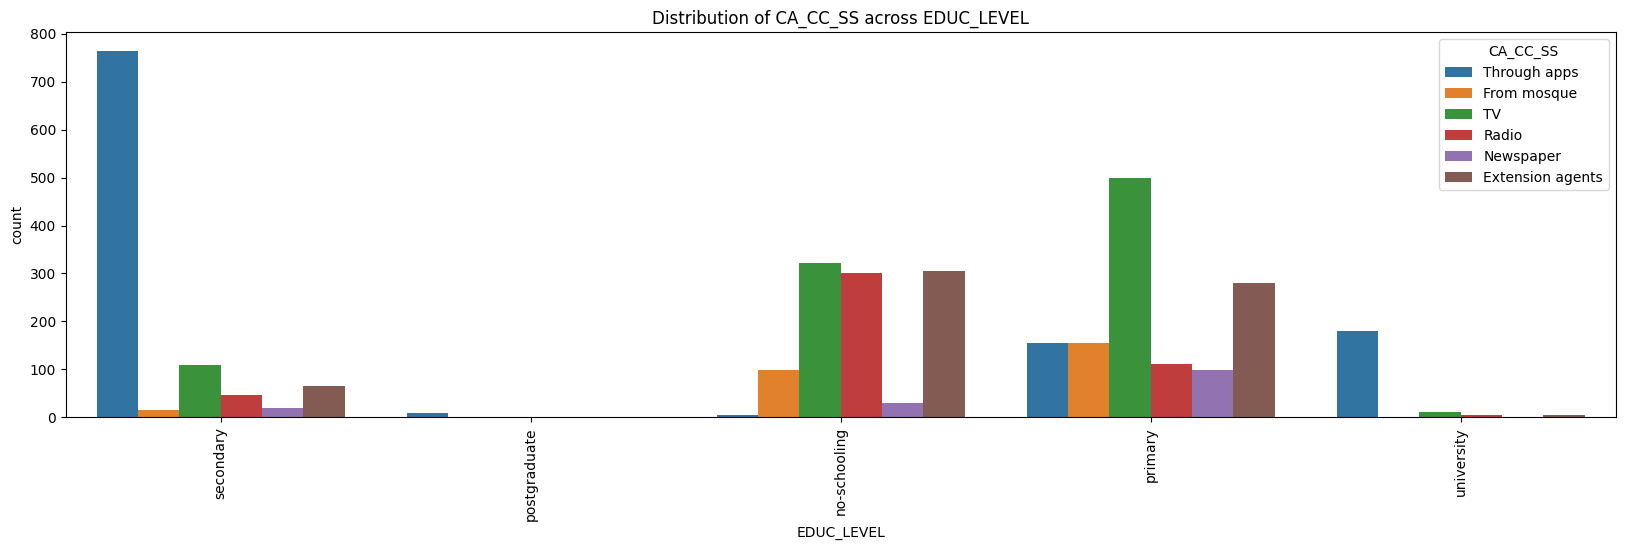

CA_CC_SS,Extension agents,From mosque,Newspaper,Radio,TV,Through apps
EDUC_LEVEL,,,,,,
no-schooling,28.84,9.33,2.83,28.37,30.25,0.38
postgraduate,0.00,11.11,0.00,0.00,0.00,88.89
primary,21.54,11.92,7.62,8.54,38.46,11.92
secondary,6.46,1.47,1.86,4.60,10.68,74.93
university,2.02,0.00,0.51,2.02,5.05,90.40
All,18.28,7.52,4.15,12.90,26.19,30.96


In [17]:
standardized_crosstab_plot(df, 'EDUC_LEVEL','CA_CC_SS')


Standardized Crosstab:
 CA_CNS        Crop varieties  Lack of knowledge  Lack of machinery  \
EDUC_LEVEL                                                           
no-schooling            0.09               9.05              34.68   
postgraduate            0.00               0.00             100.00   
primary                 0.00              11.69              68.46   
secondary               0.20              15.67              77.67   
university              0.00              26.77              71.72   
All                     0.08              12.84              61.35   

CA_CNS        No finance  Not profitable  Pest and diseases  
EDUC_LEVEL                                                   
no-schooling       51.56            4.52               0.09  
postgraduate        0.00            0.00               0.00  
primary            17.15            2.69               0.00  
secondary           6.27            0.10               0.10  
university          1.52            0.00  

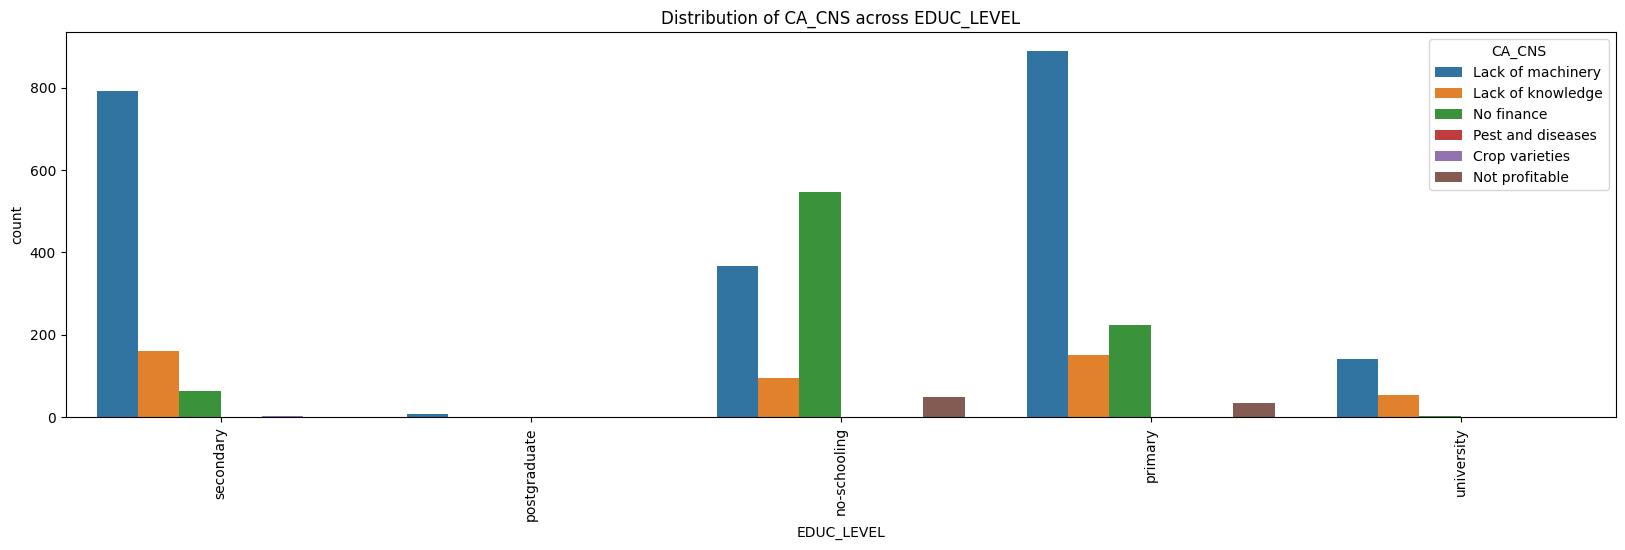

CA_CNS,Crop varieties,Lack of knowledge,Lack of machinery,No finance,Not profitable,Pest and diseases
EDUC_LEVEL,,,,,,
no-schooling,0.09,9.05,34.68,51.56,4.52,0.09
postgraduate,0.00,0.00,100.00,0.00,0.00,0.00
primary,0.00,11.69,68.46,17.15,2.69,0.00
secondary,0.20,15.67,77.67,6.27,0.10,0.10
university,0.00,26.77,71.72,1.52,0.00,0.00
All,0.08,12.84,61.35,23.32,2.34,0.06


In [18]:
standardized_crosstab_plot(df, 'EDUC_LEVEL','CA_CNS')

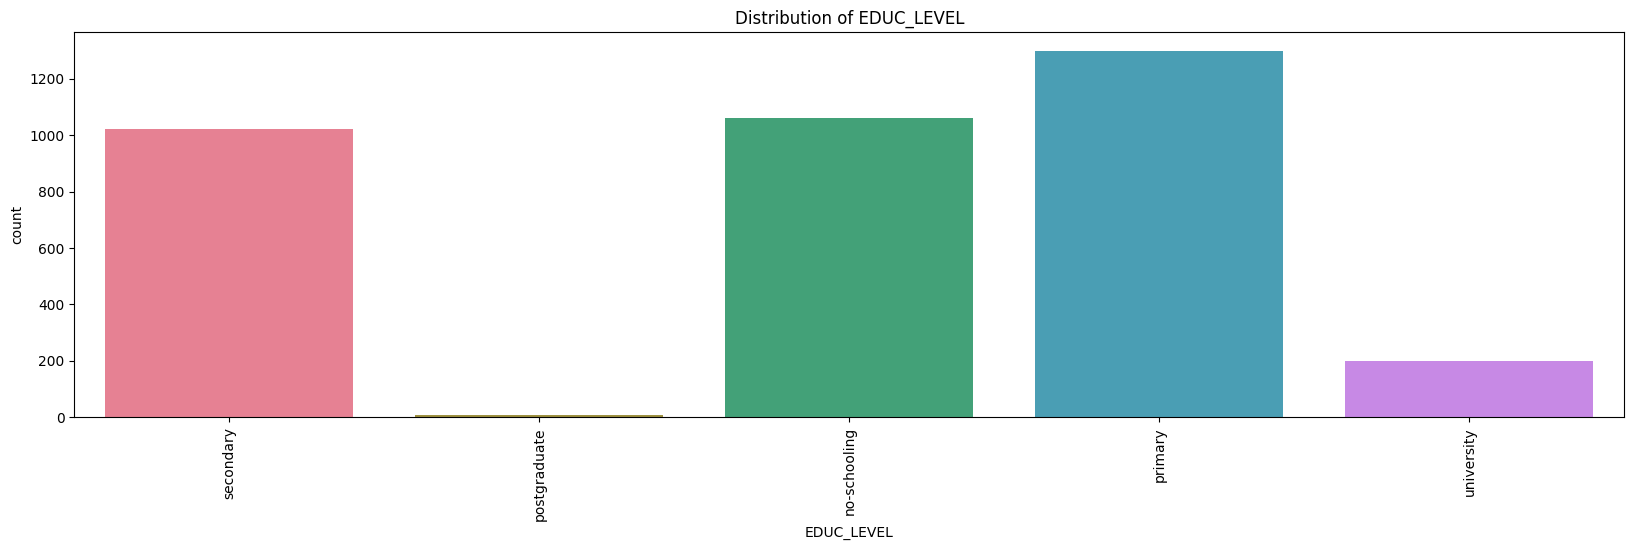

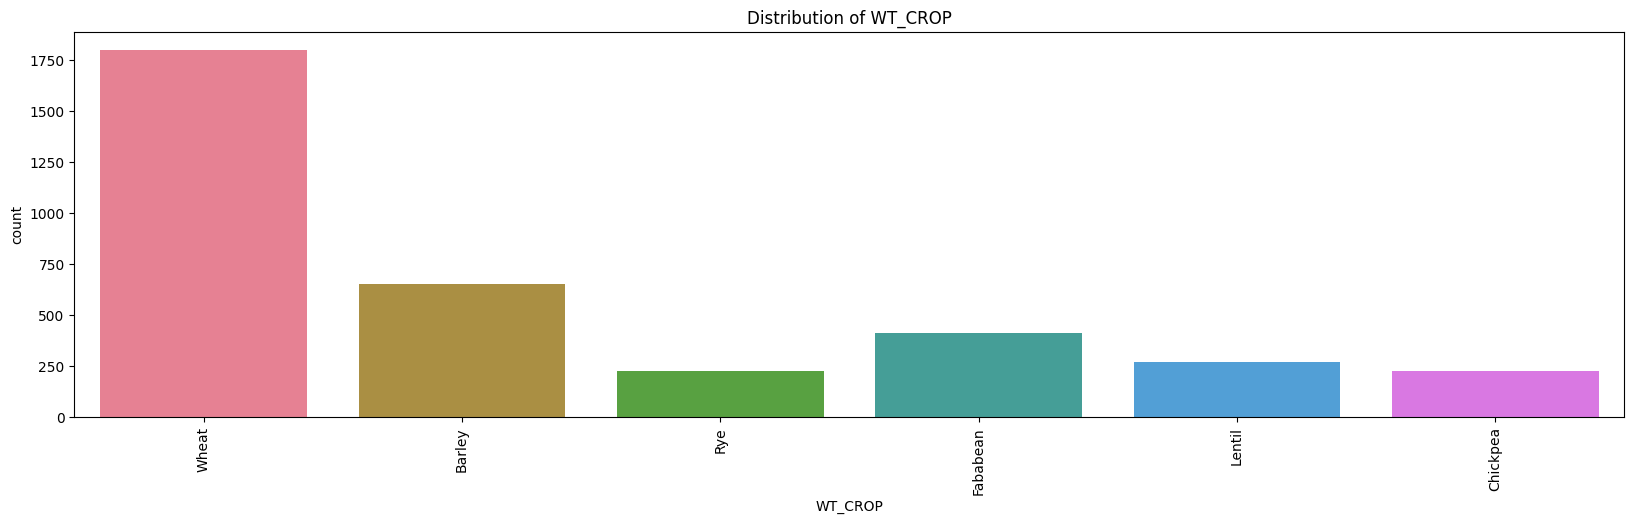

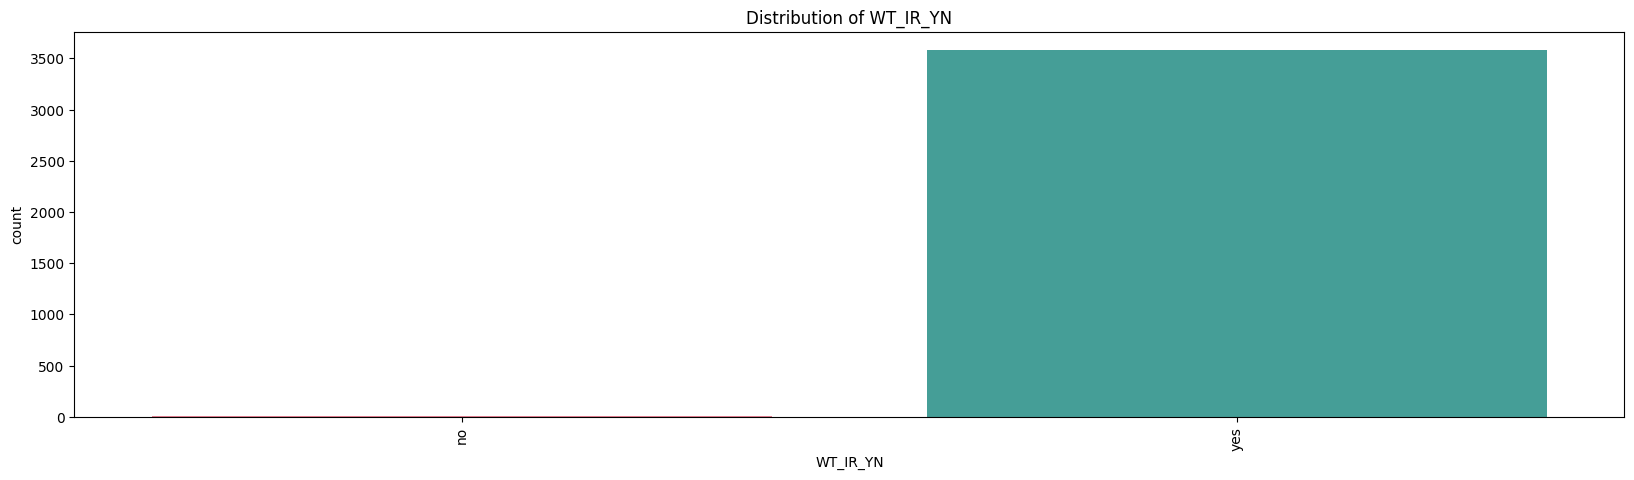

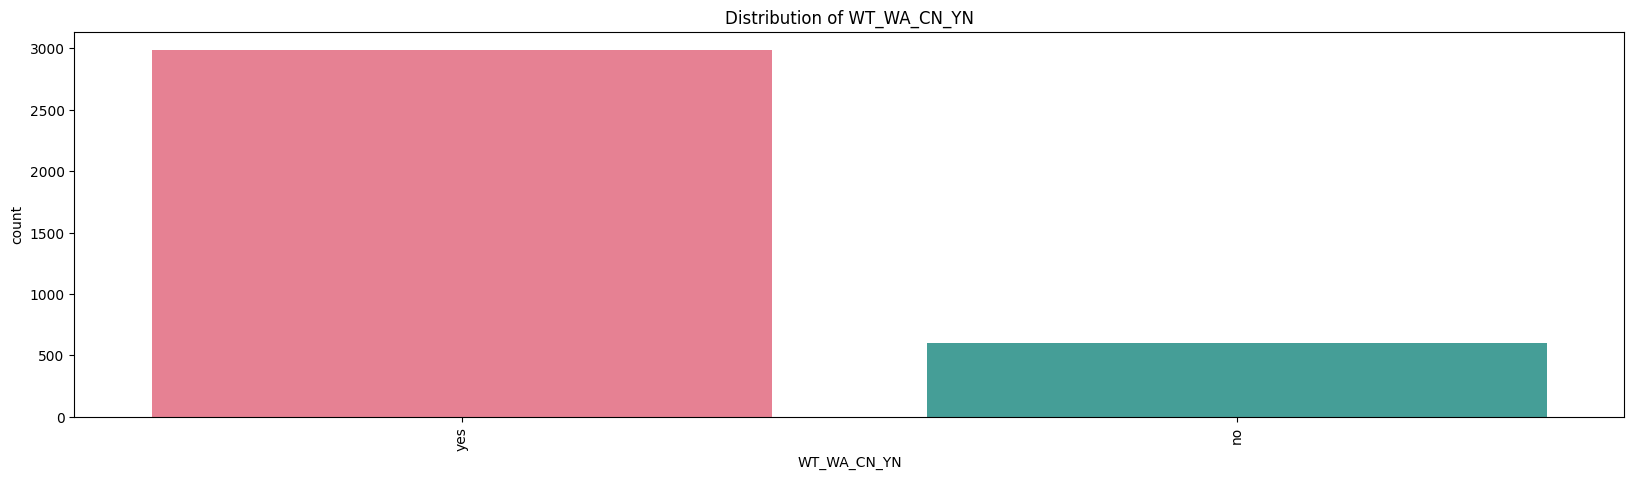

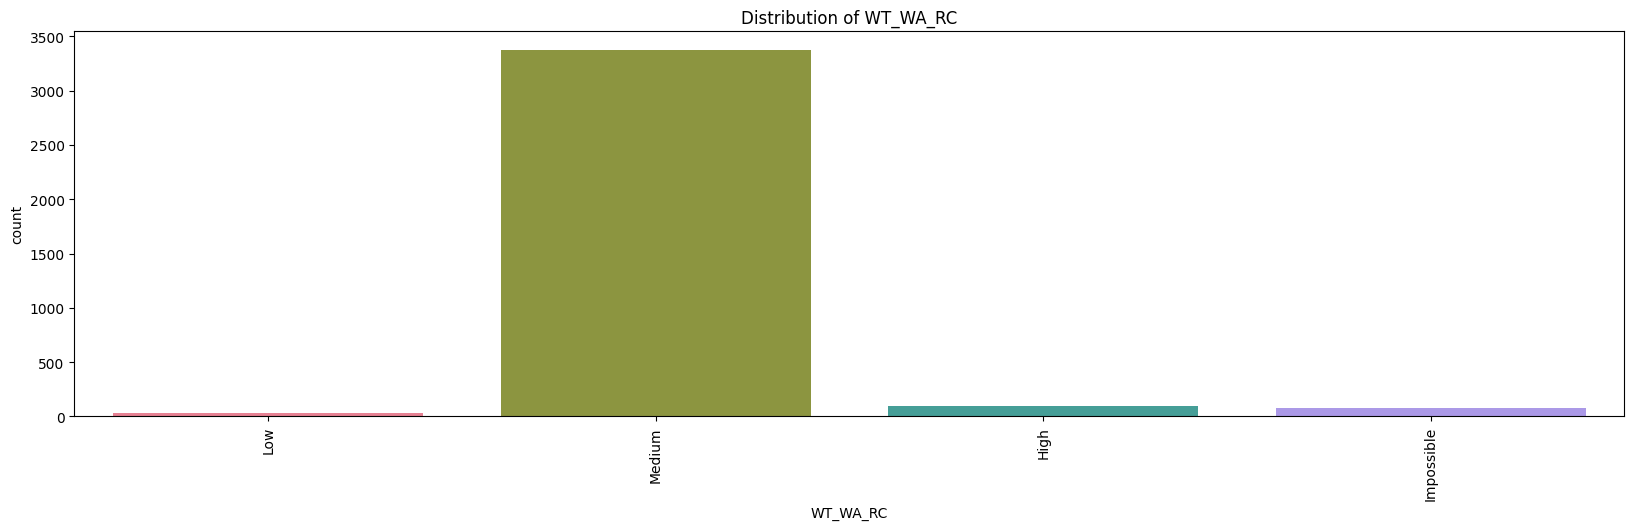

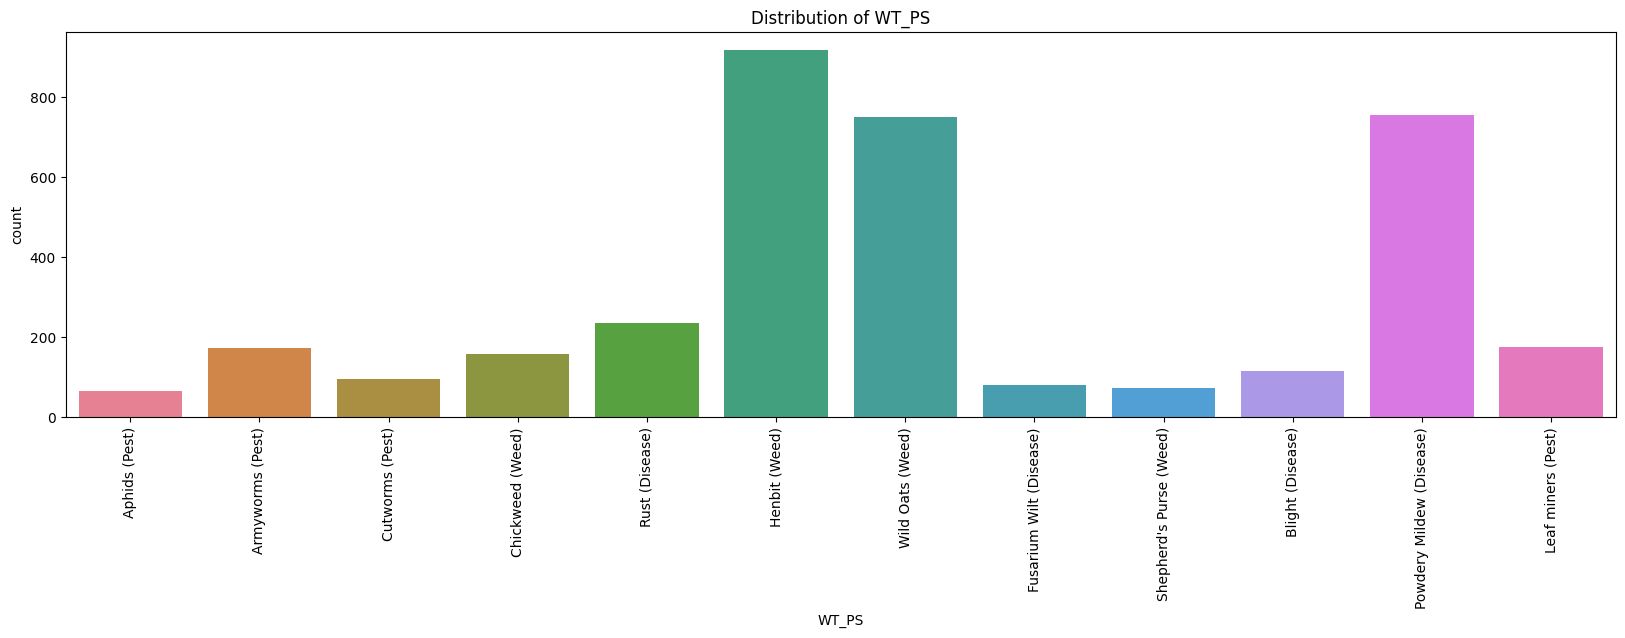

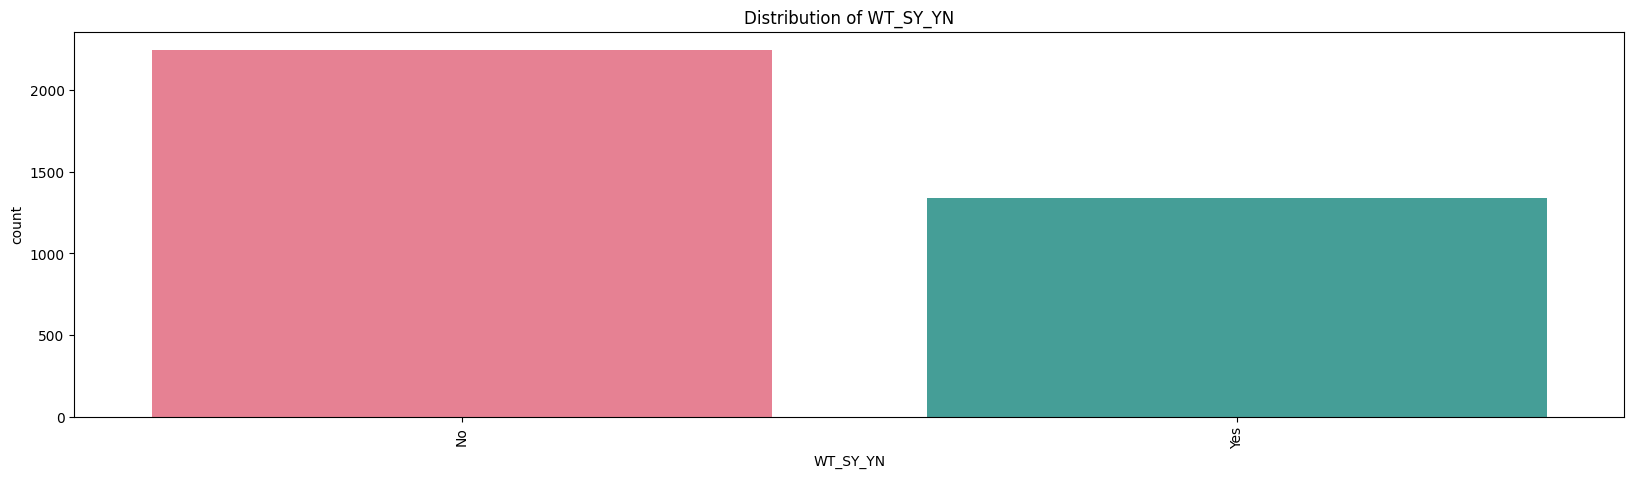

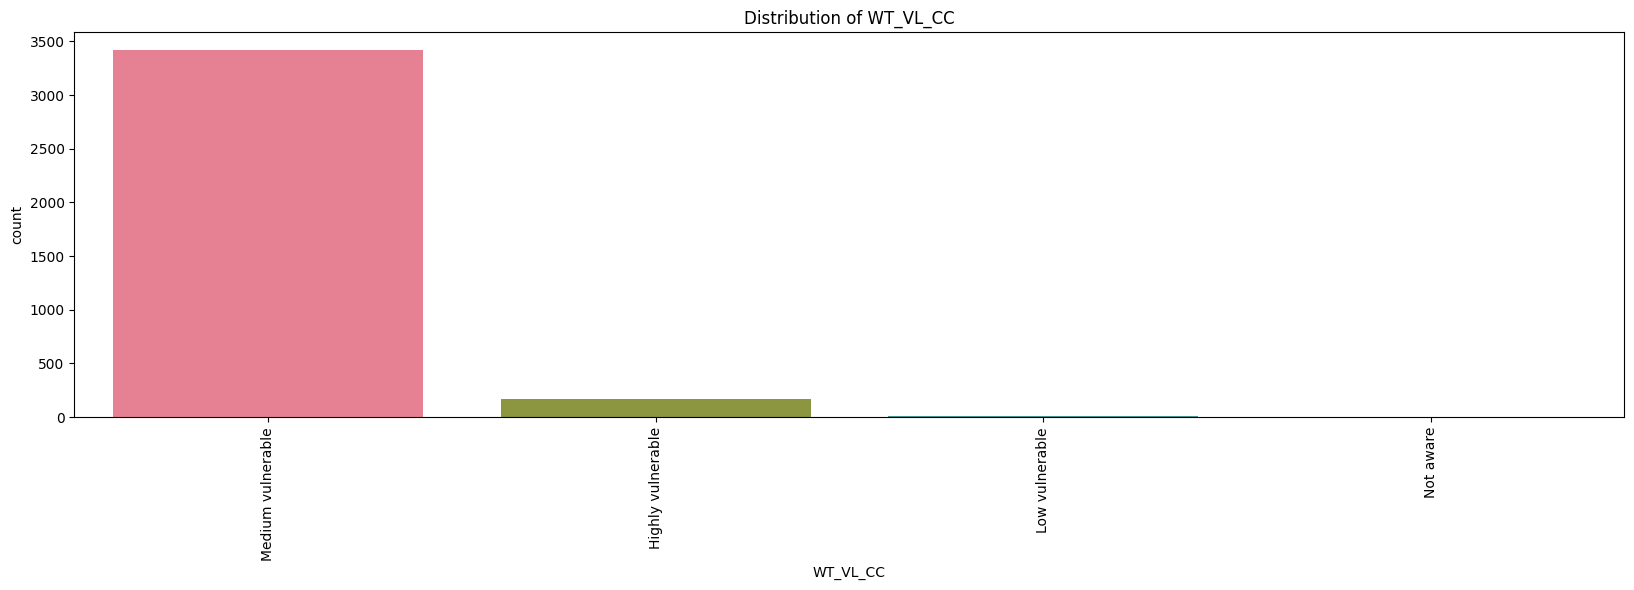

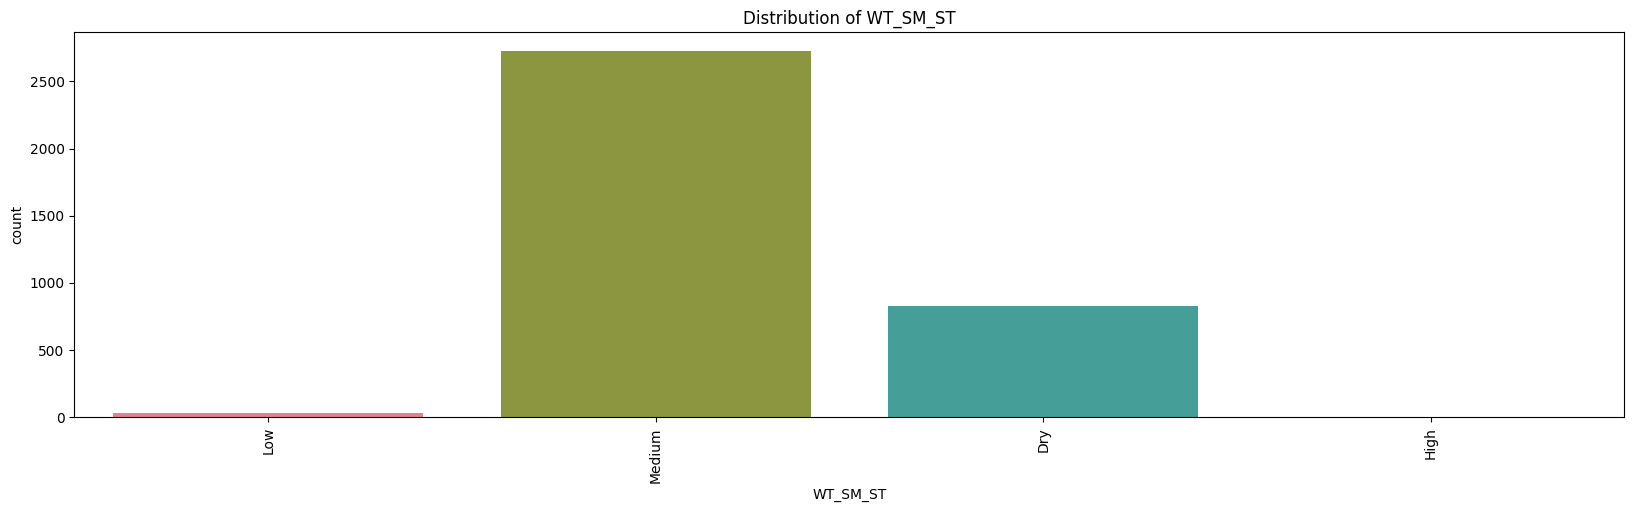

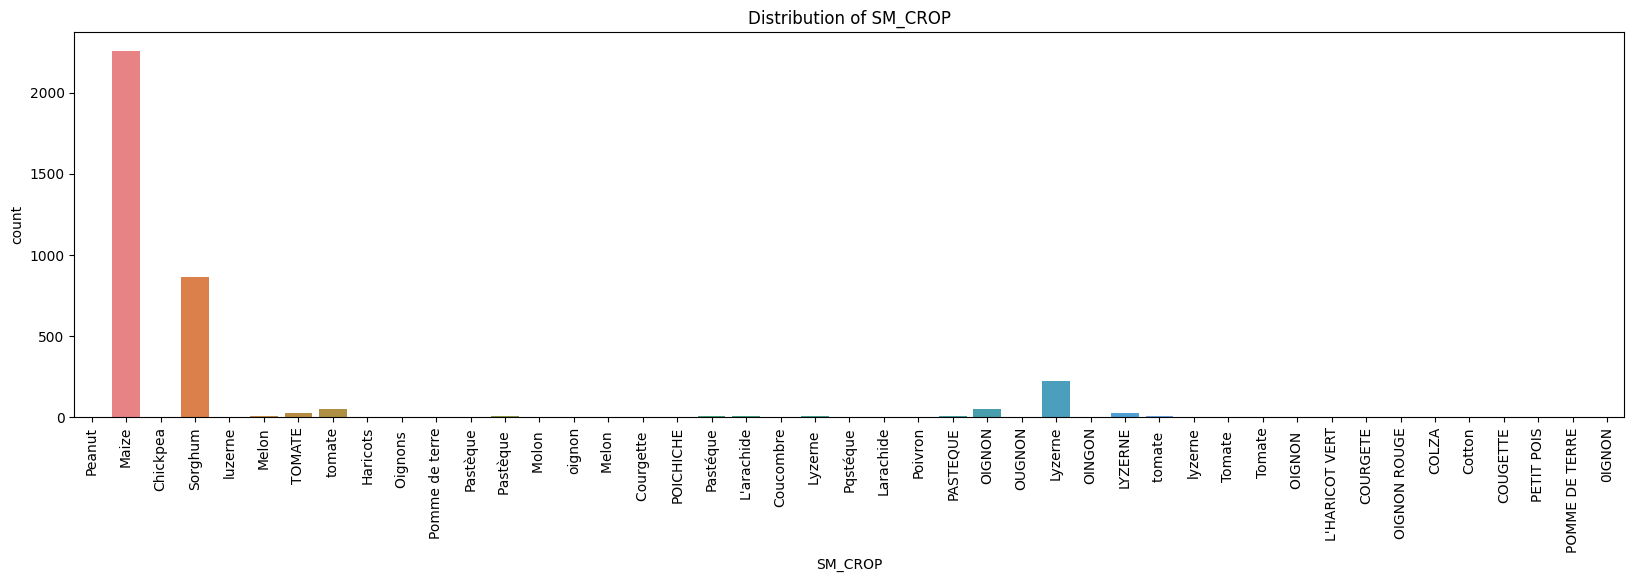

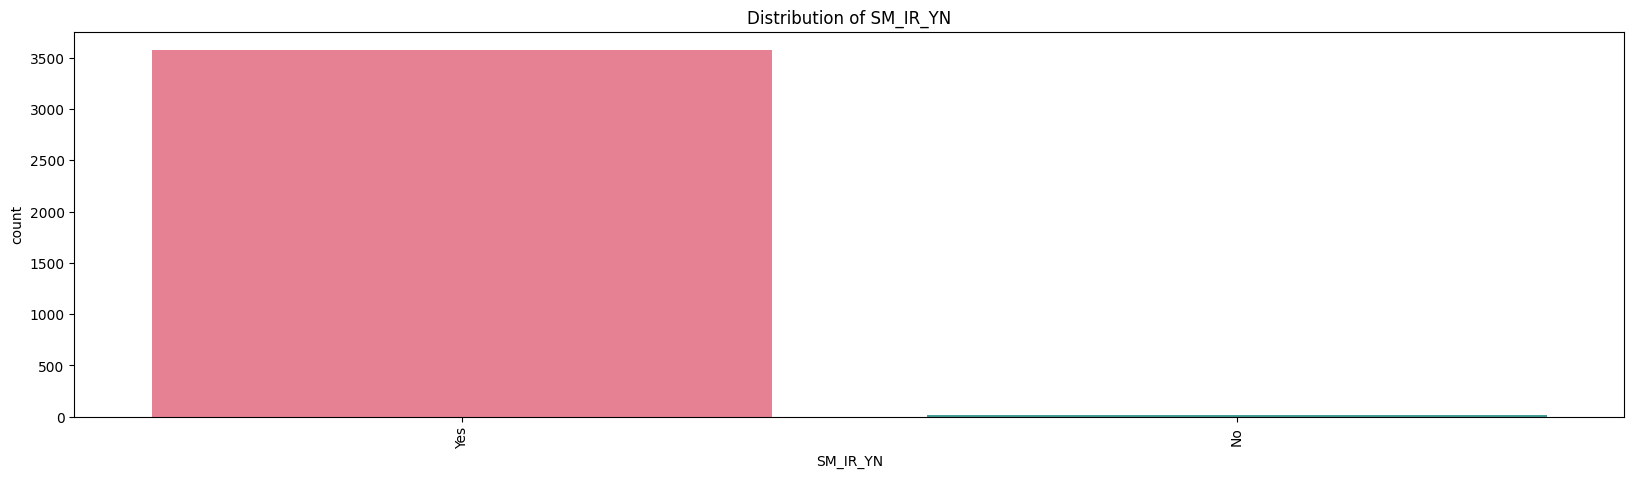

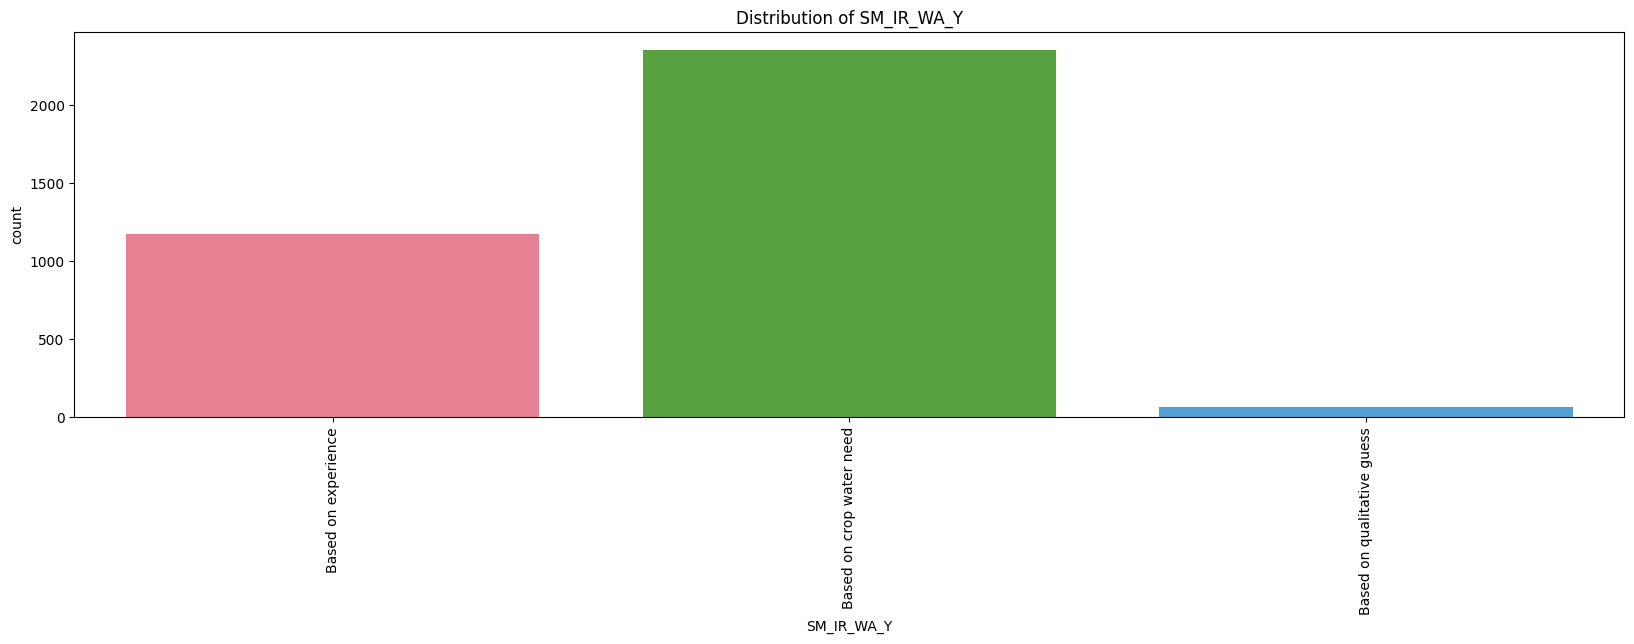

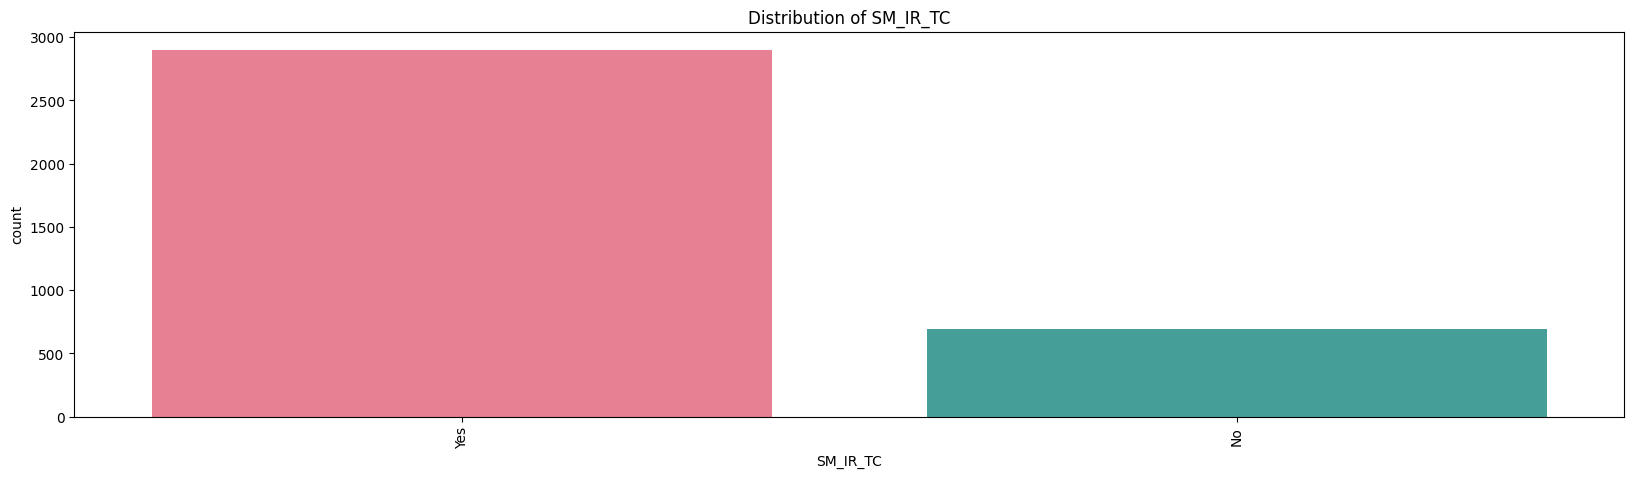

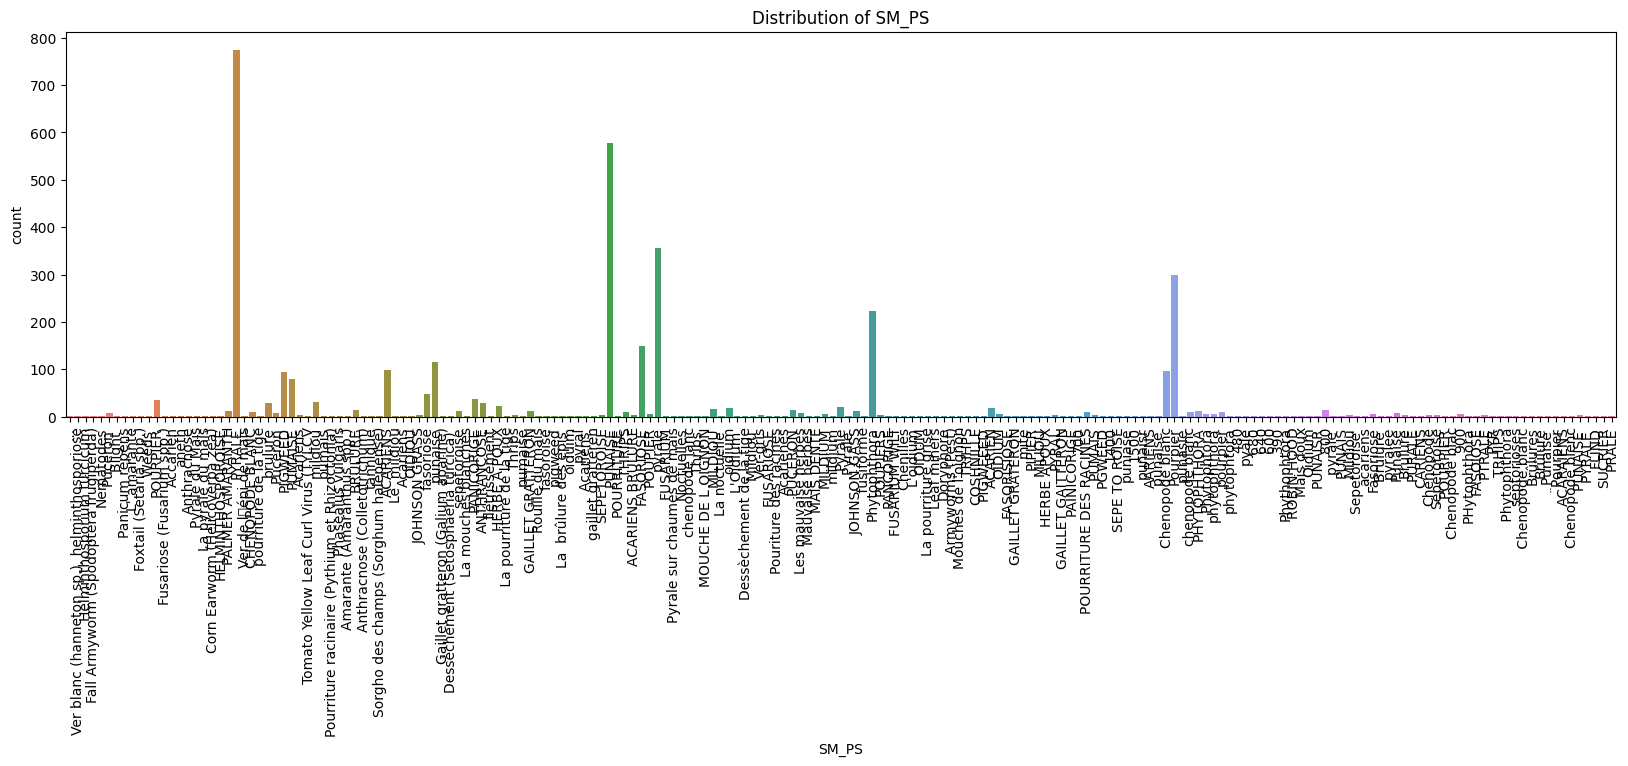

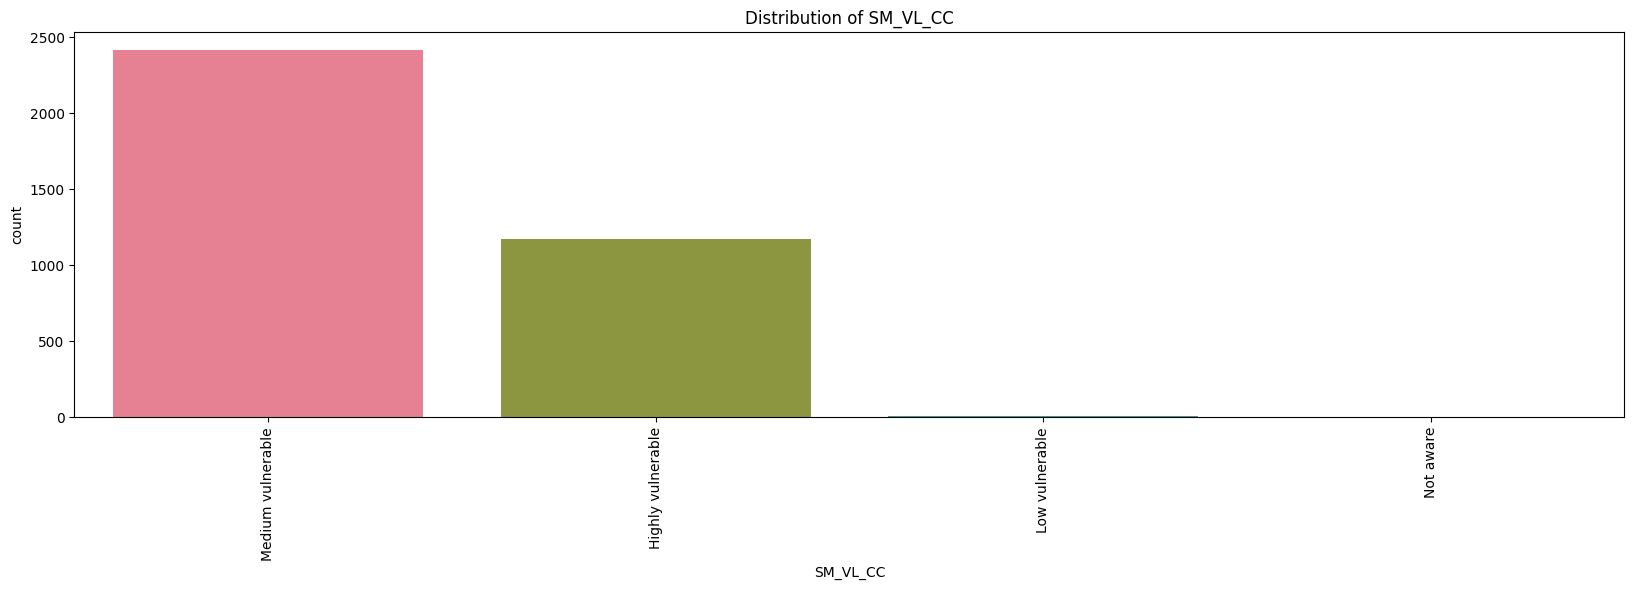

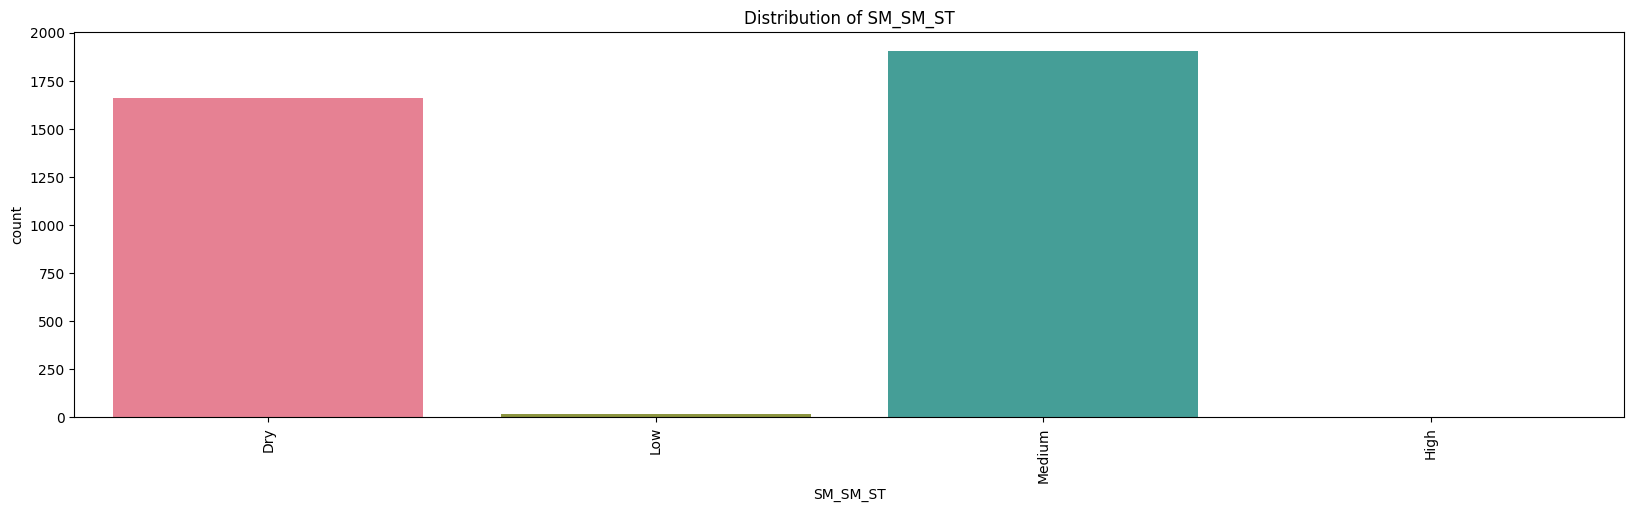

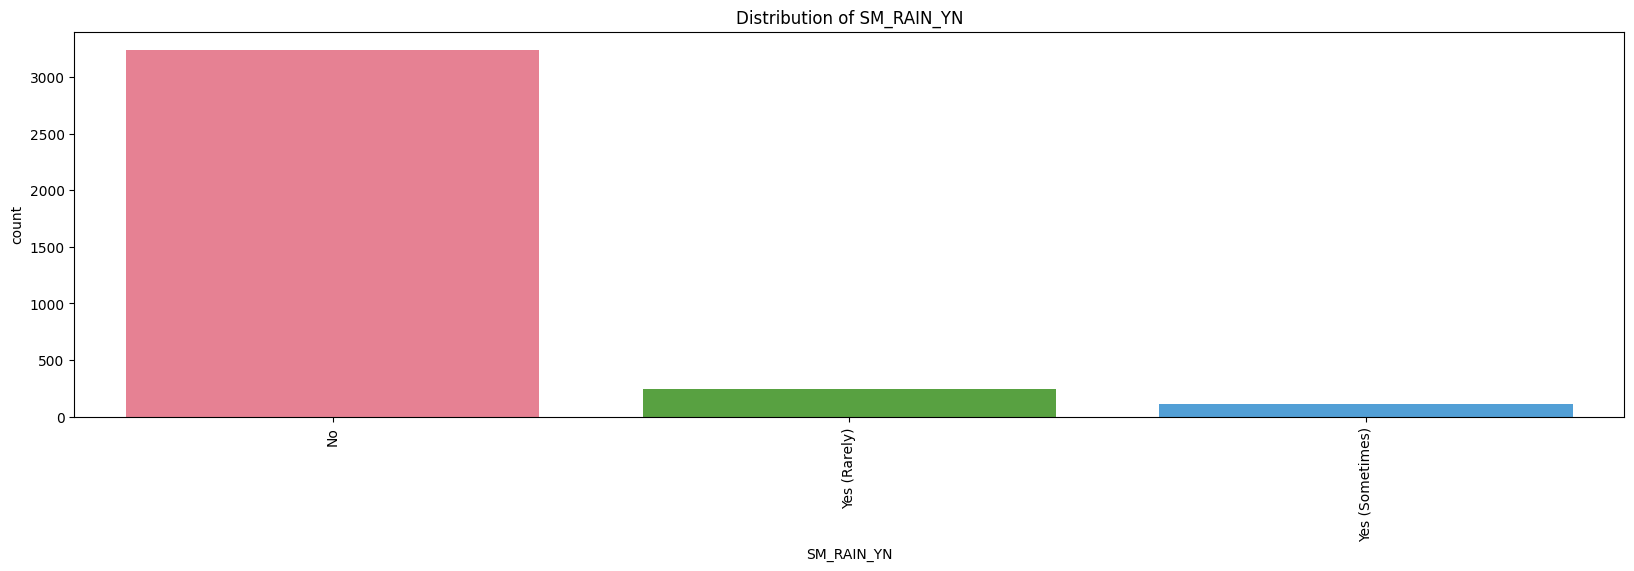

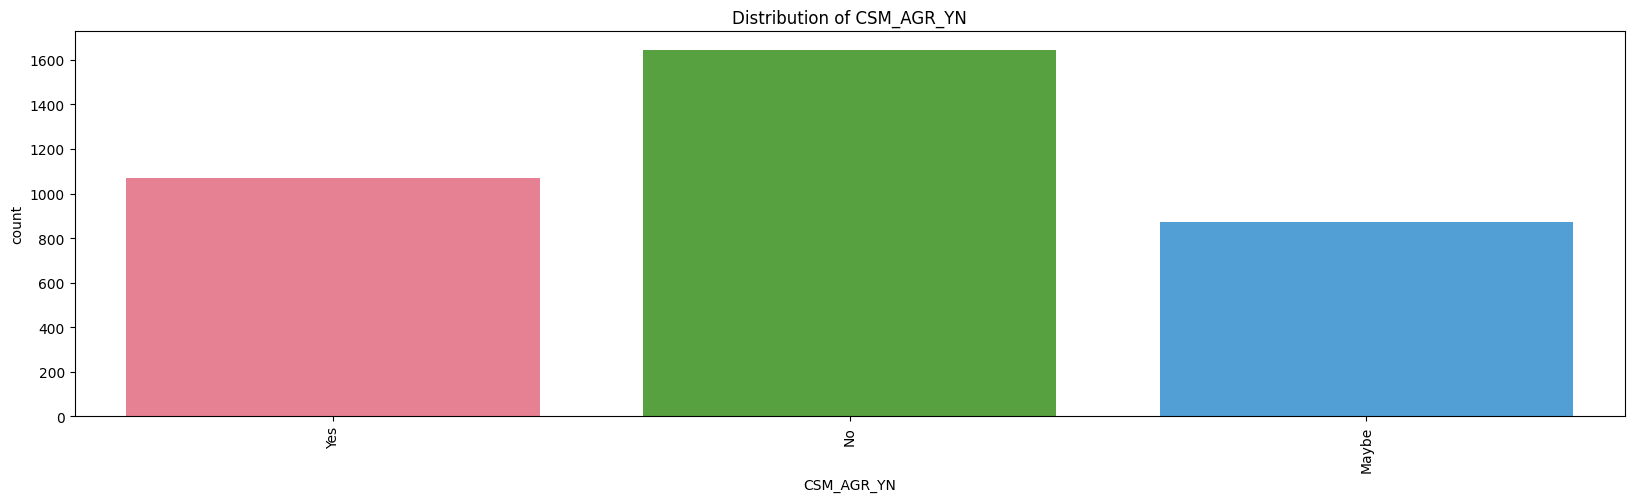

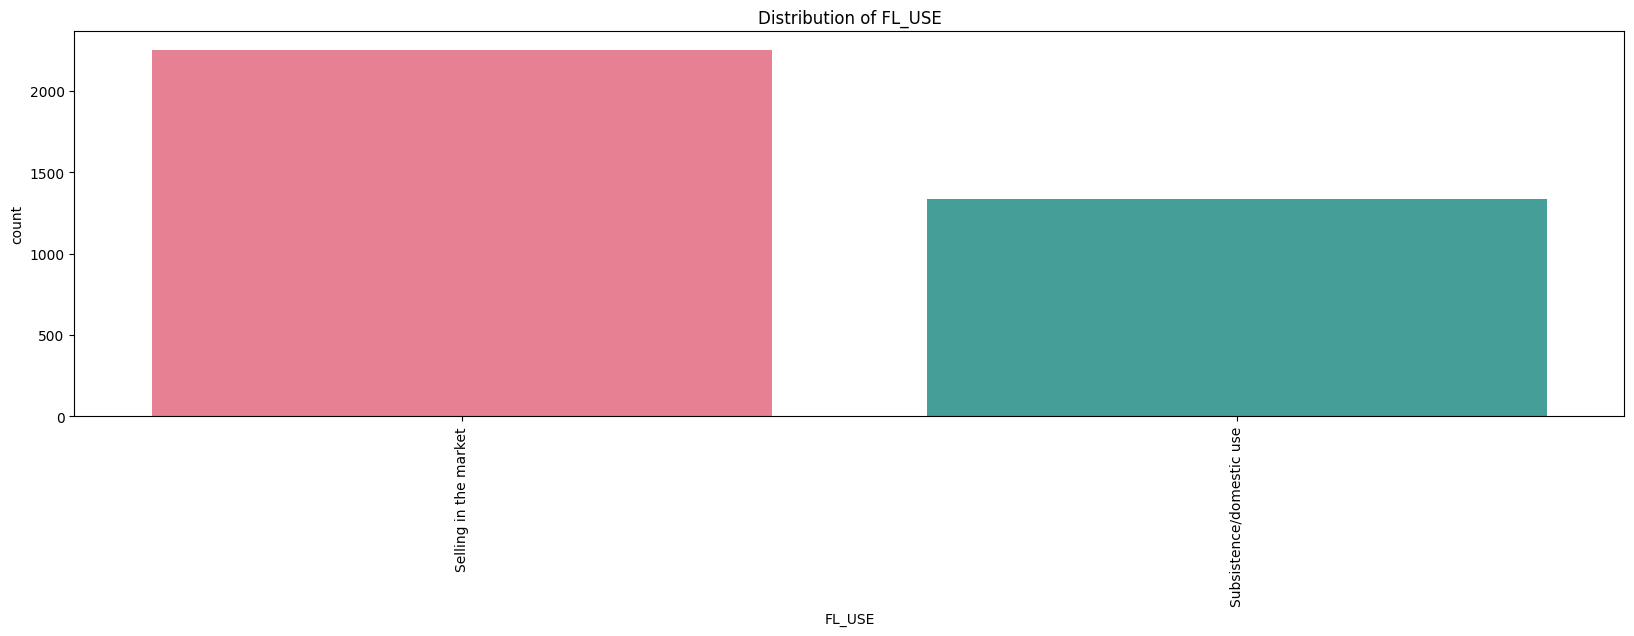

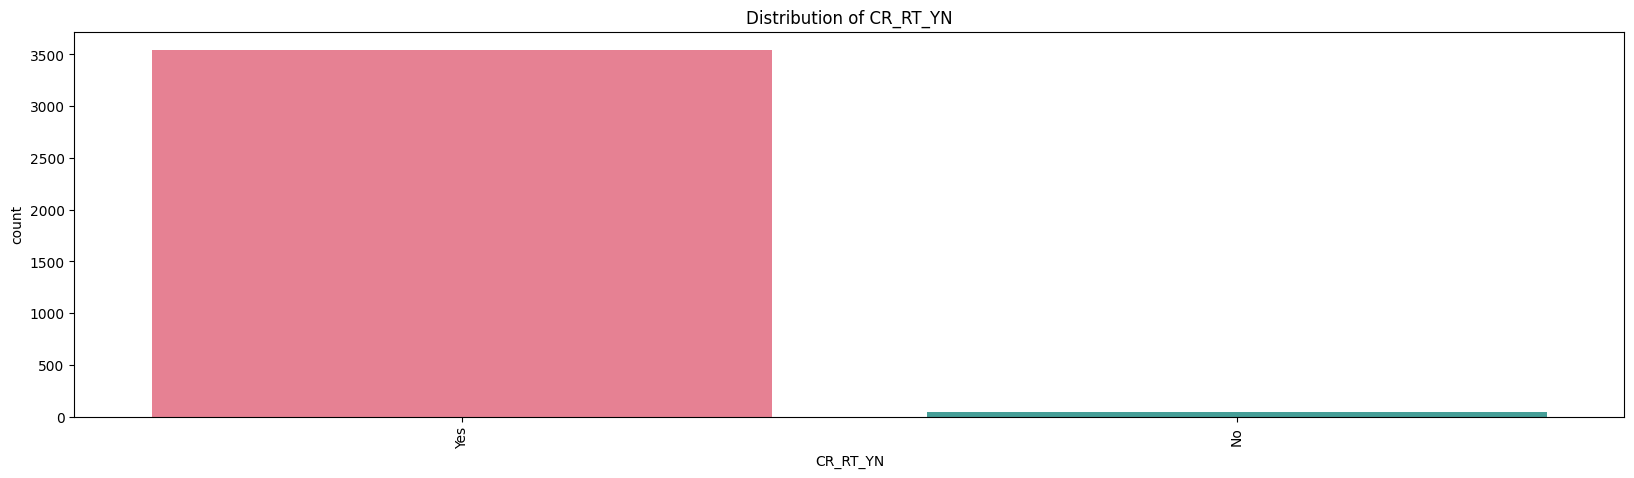

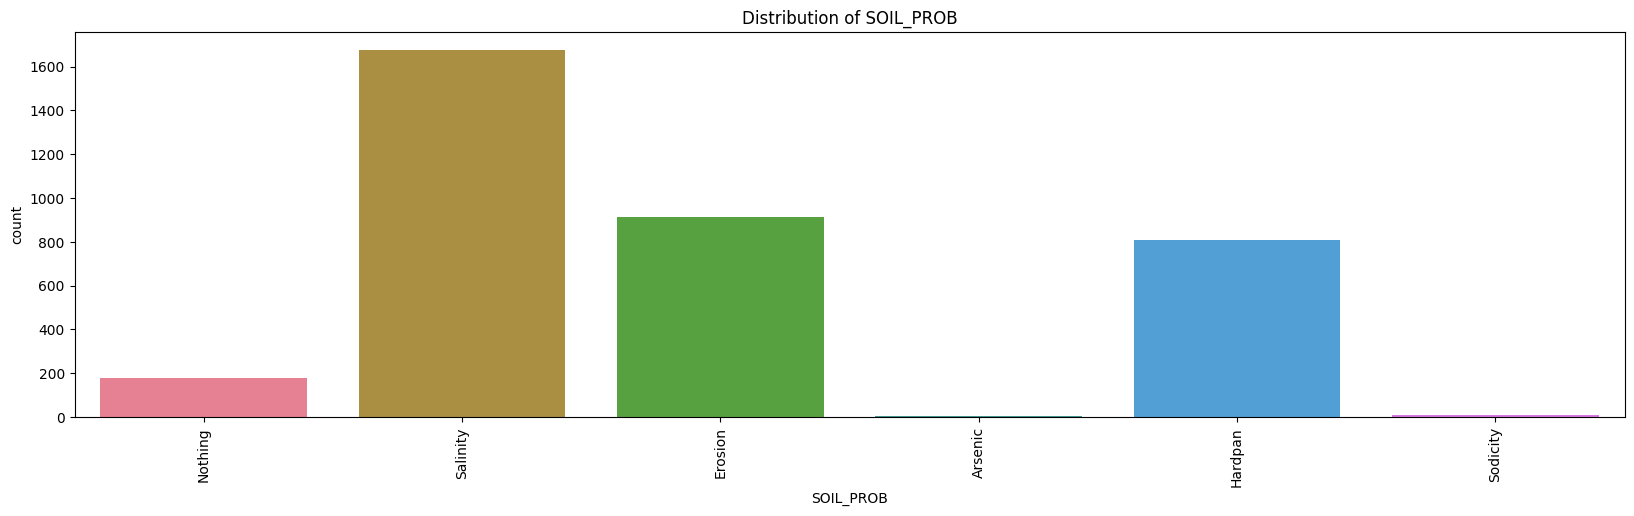

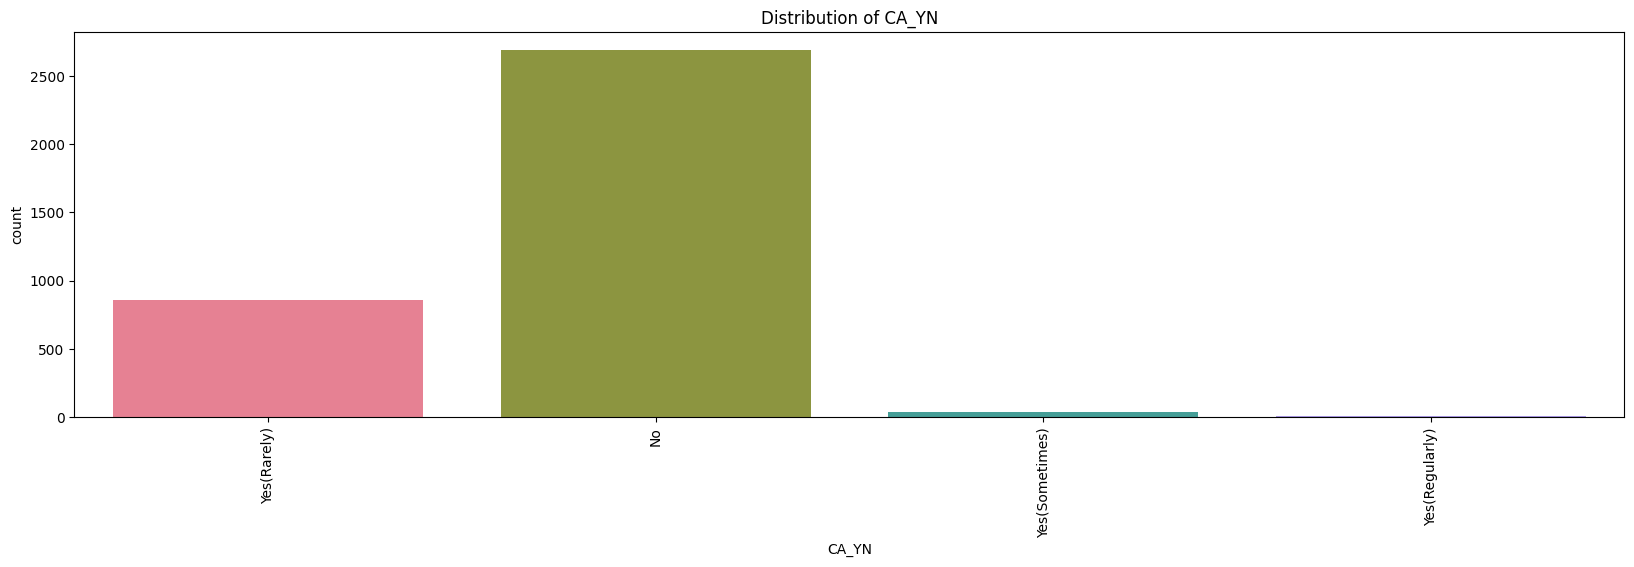

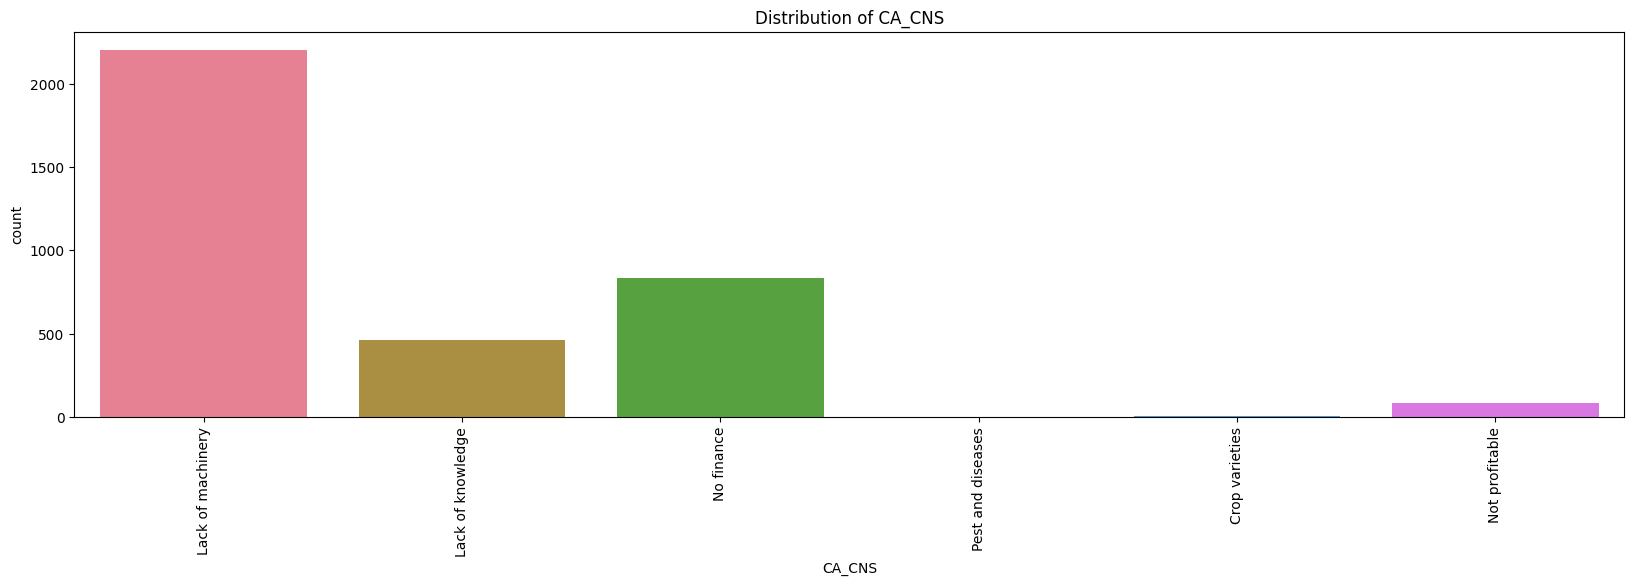

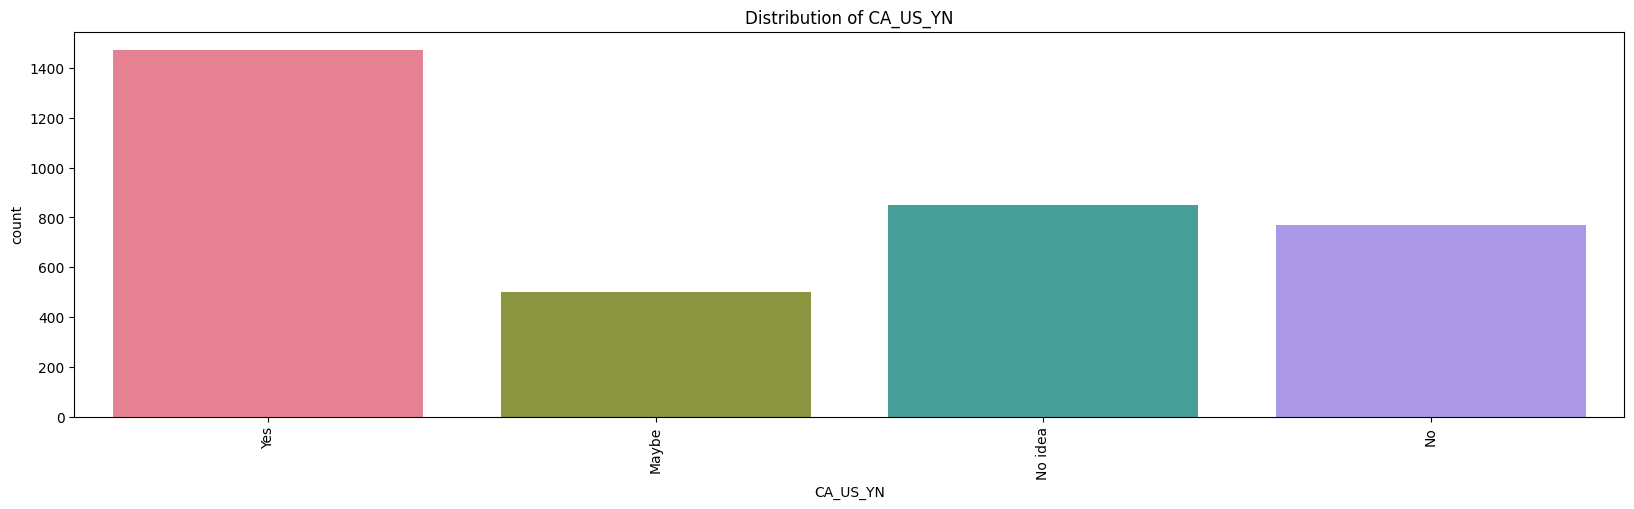

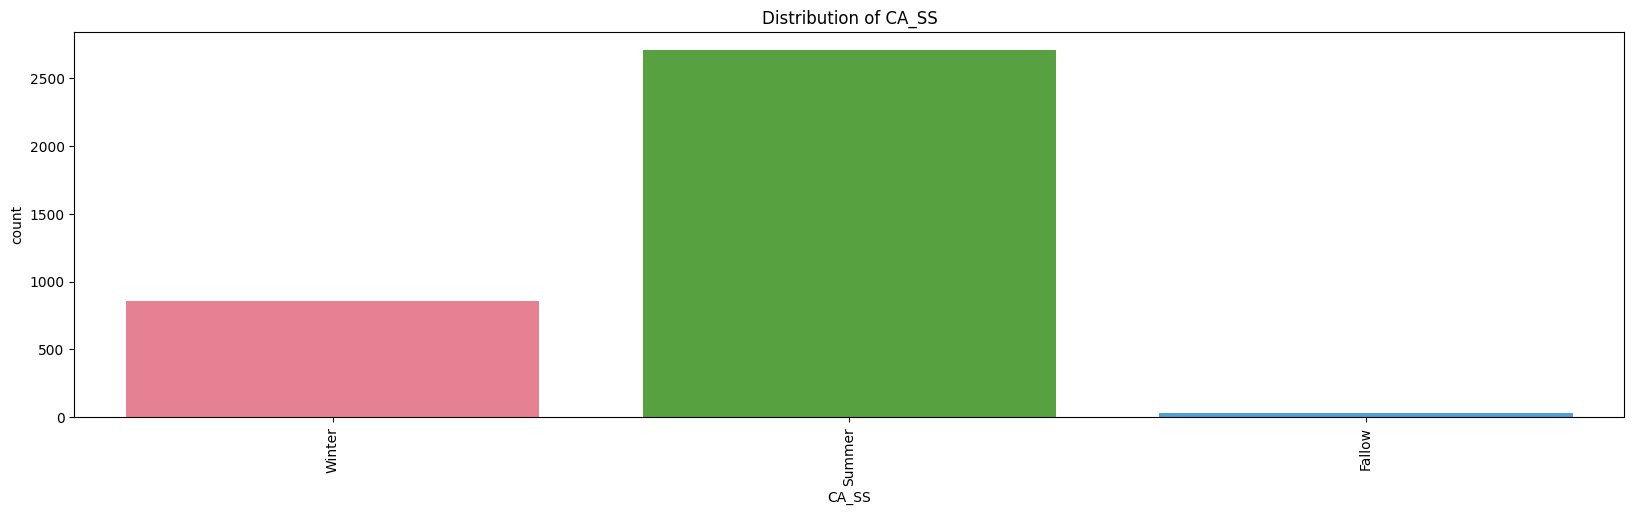

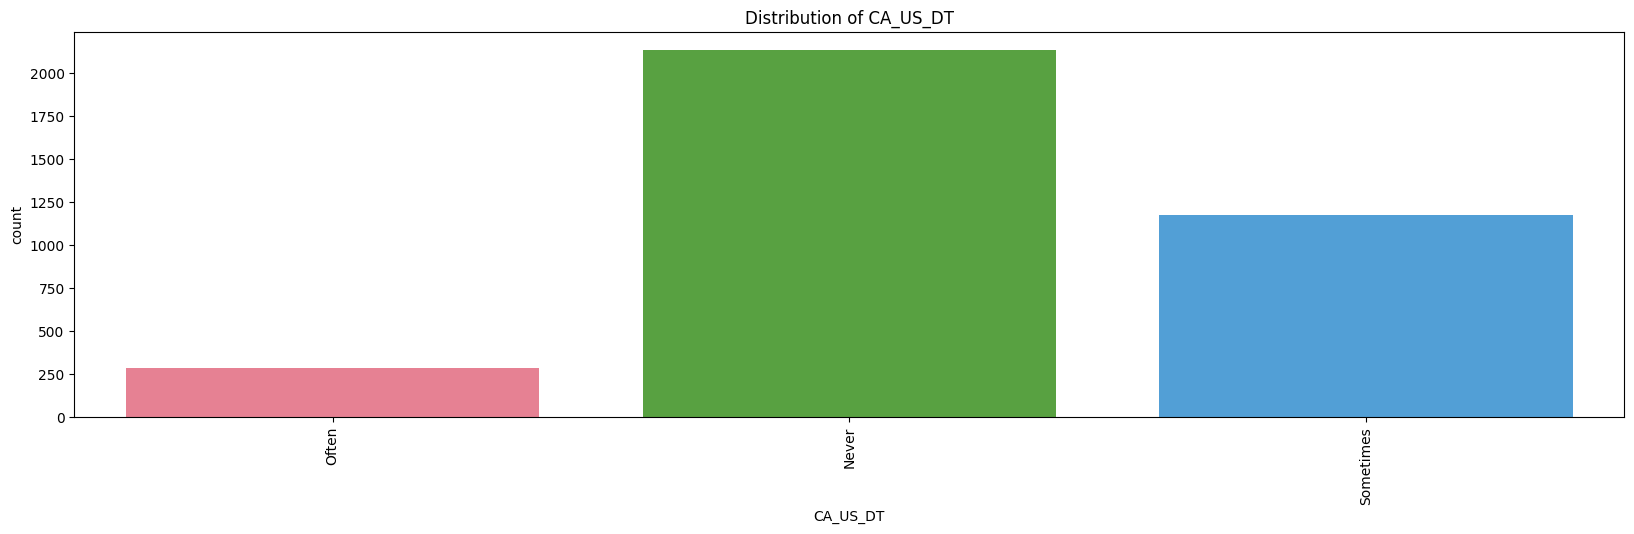

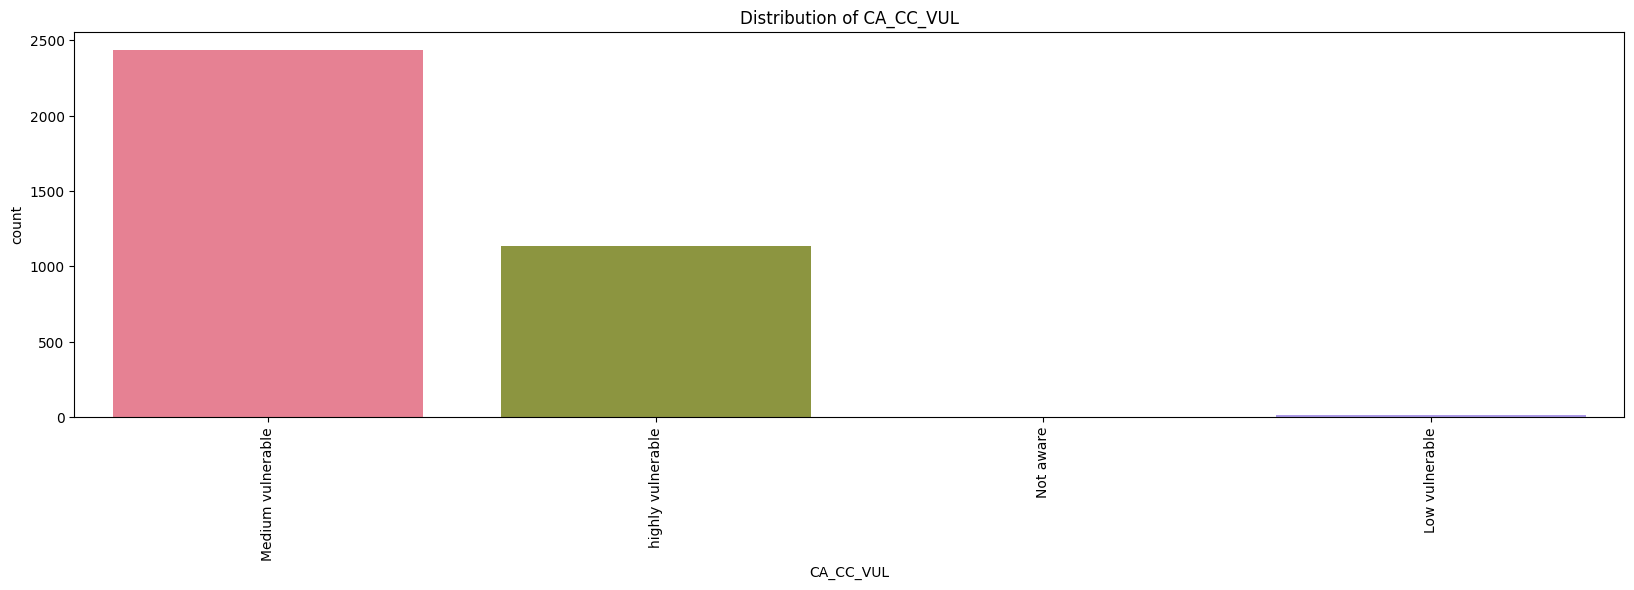

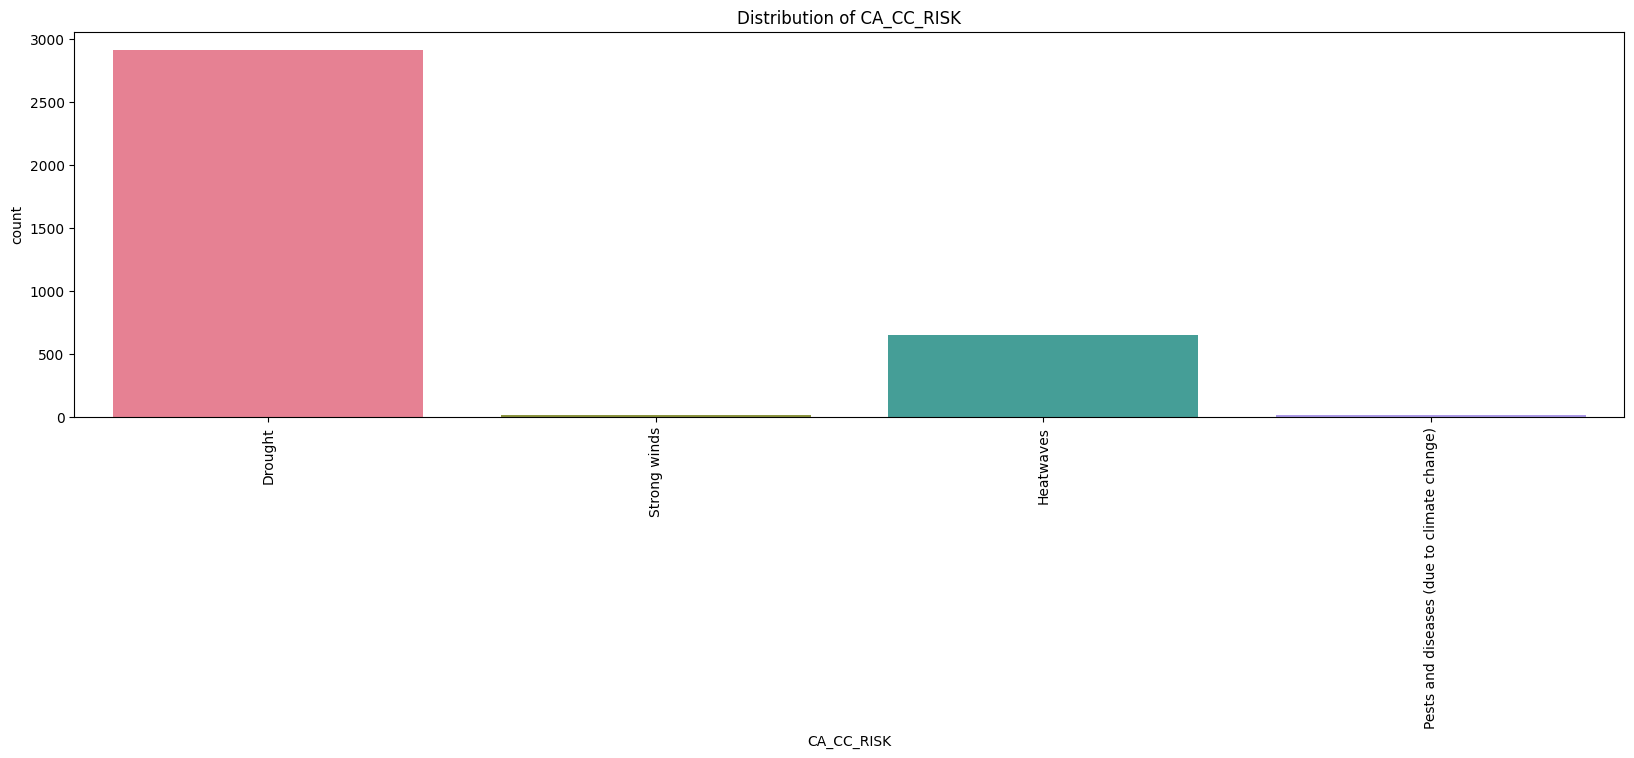

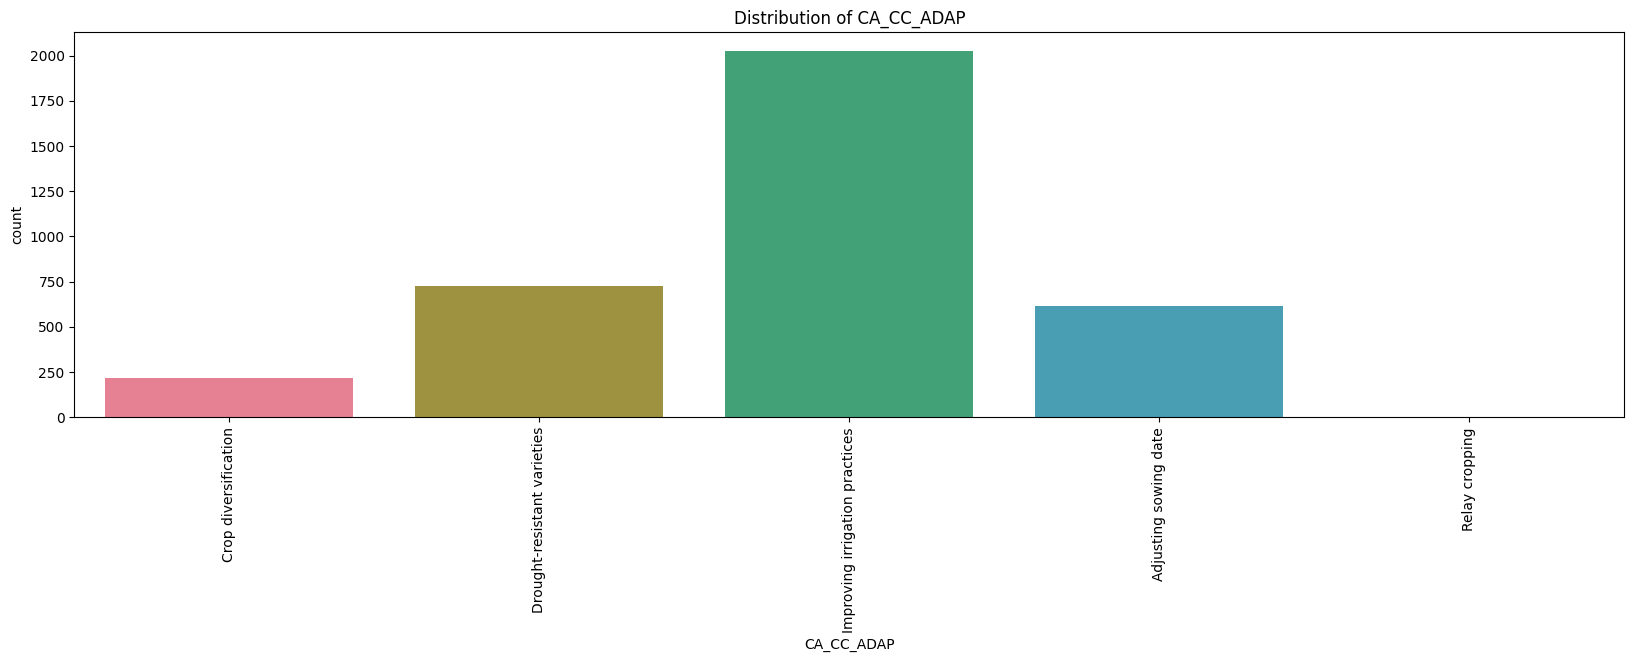

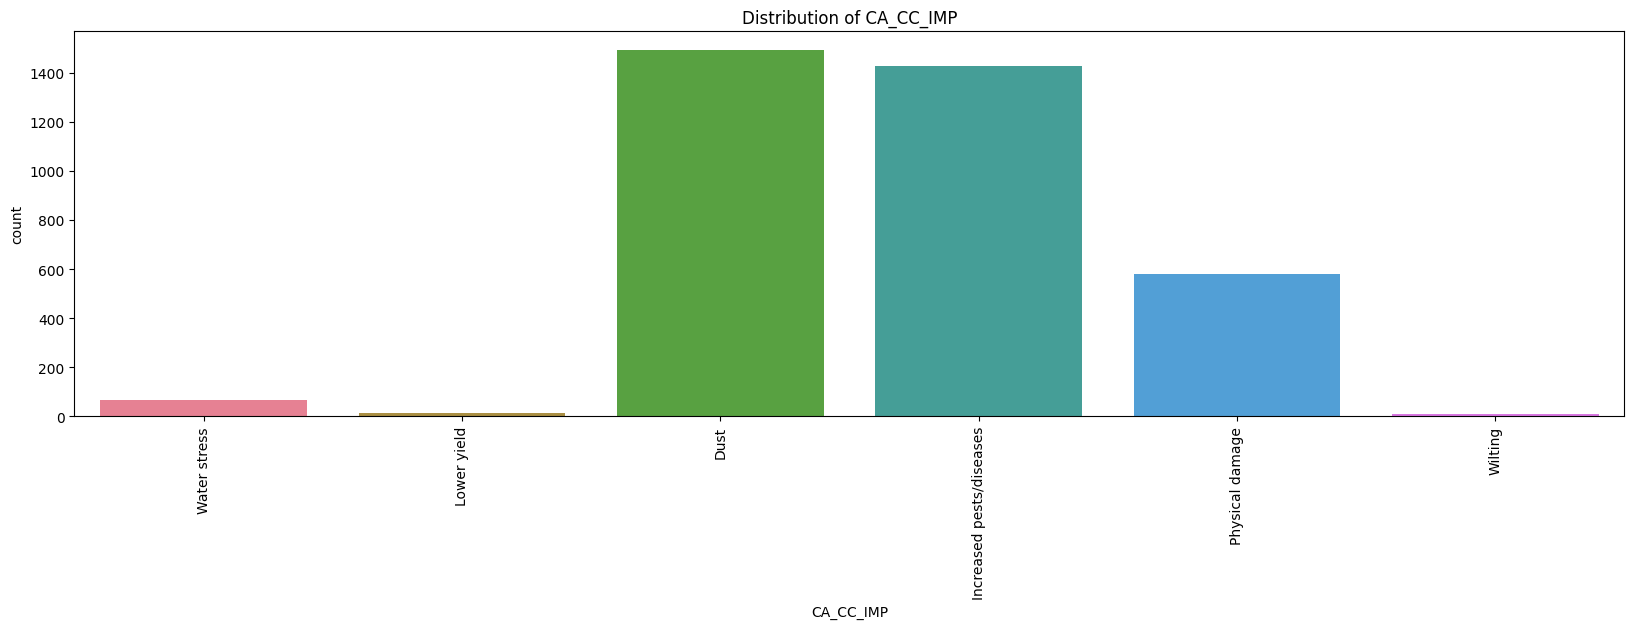

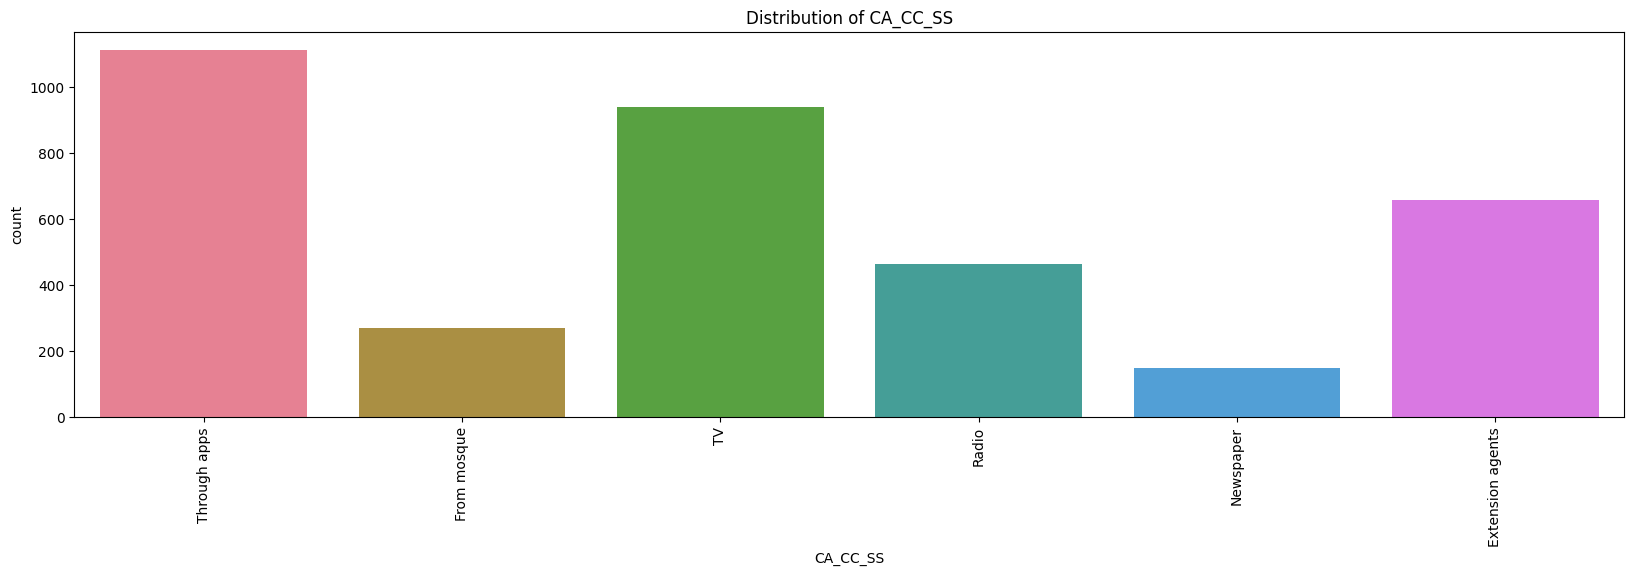

In [19]:

def plot_categorical_distributions(df):
    """
    Automatically identifies categorical variables and plots their count distributions with different colors.

    Parameters:
    - df: Pandas DataFrame containing categorical and numerical variables.

    Returns:
    - Displays count plots for each categorical variable.
    """
    # Automatically detect categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # If no categorical columns are found, print a message and return
    if len(categorical_cols) == 0:
        print("No categorical variables found in the dataset.")
        return

    # Loop through categorical columns and plot their distributions
    for col in categorical_cols:
        plt.figure(figsize=(20, 5))

        # Generate unique colors based on category count
        unique_values = df[col].nunique()
        palette = sns.color_palette("husl", unique_values)  # Assign different colors

        sns.countplot(data=df, x=col, palette=palette)

        plt.xticks(rotation=90)
        plt.title(f"Distribution of {col}")
        plt.show()

# Example Usage
plot_categorical_distributions(df)


<Axes: xlabel='TEMPERATUR', ylabel='PRECIPITAT'>

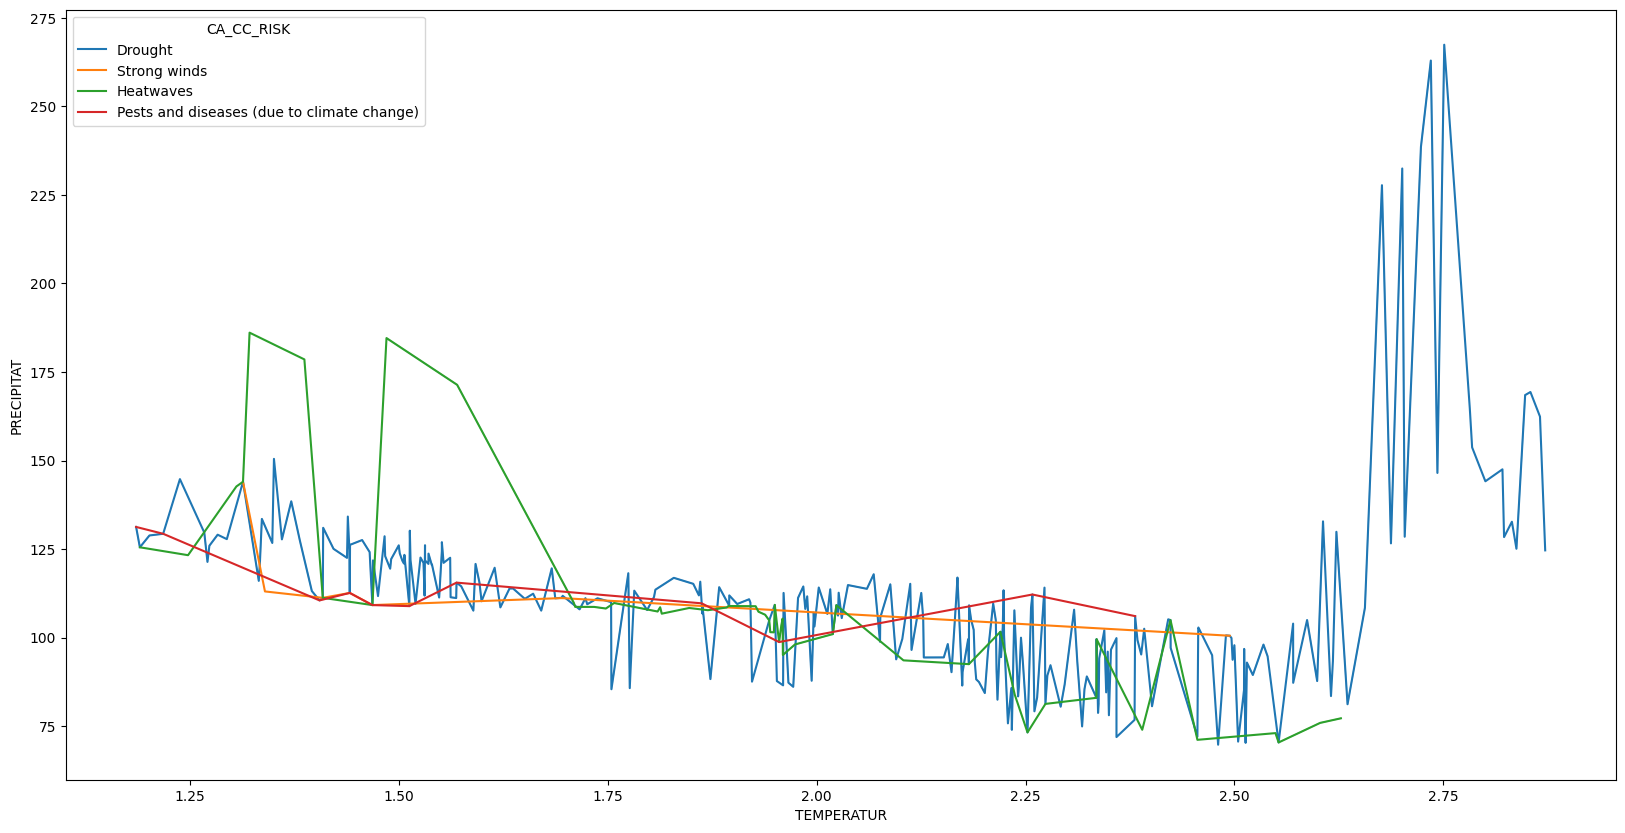

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x = 'TEMPERATUR' , y = 'PRECIPITAT', ci = False ,hue='CA_CC_RISK')


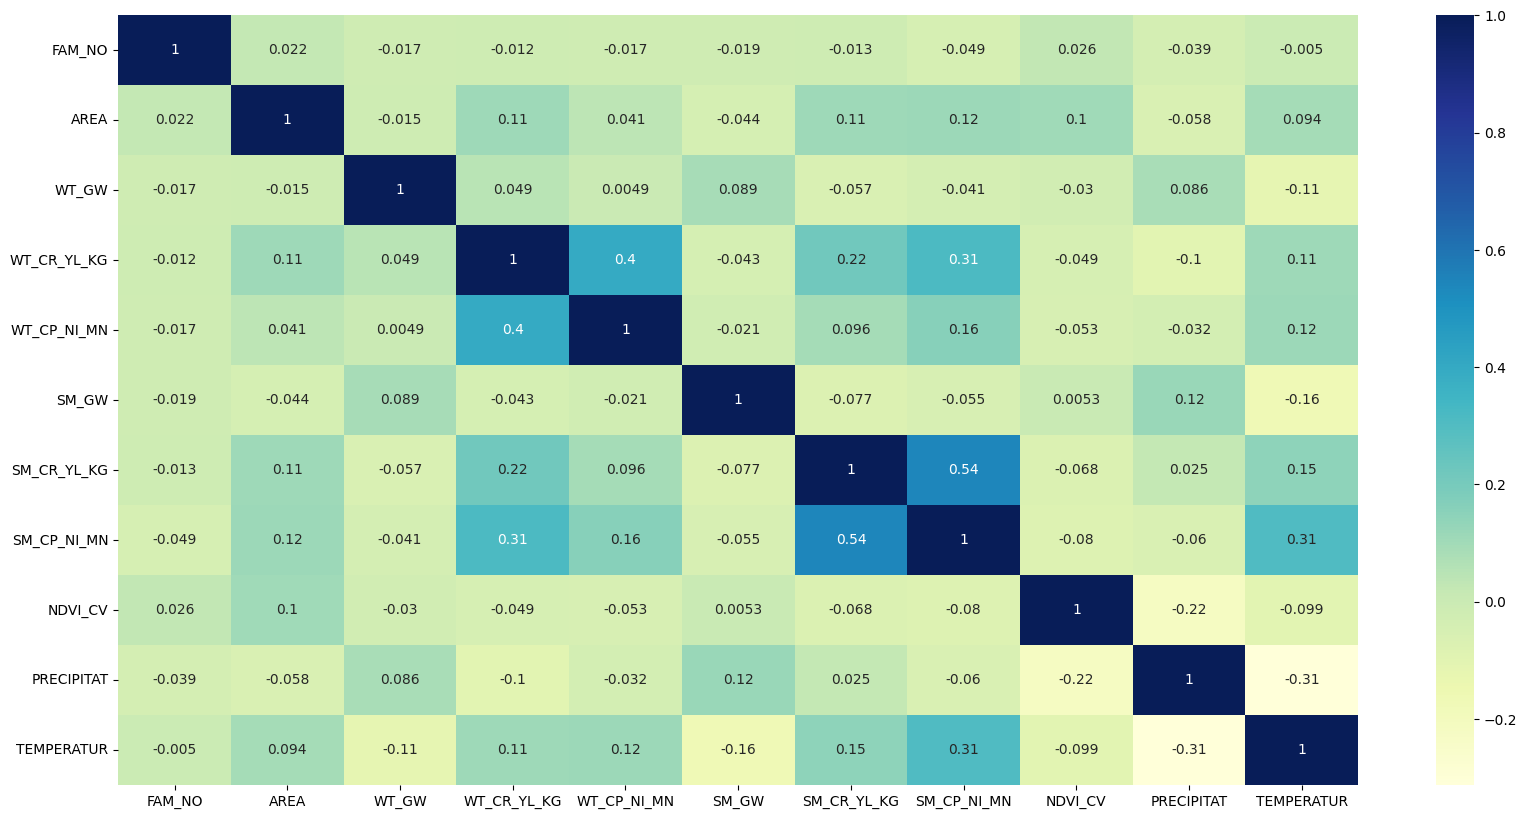

In [21]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
df_number = df[cols_list]
plt.figure(figsize=(20,10))
sns.heatmap(data=df_number.corr(), annot=True, cmap='YlGnBu');

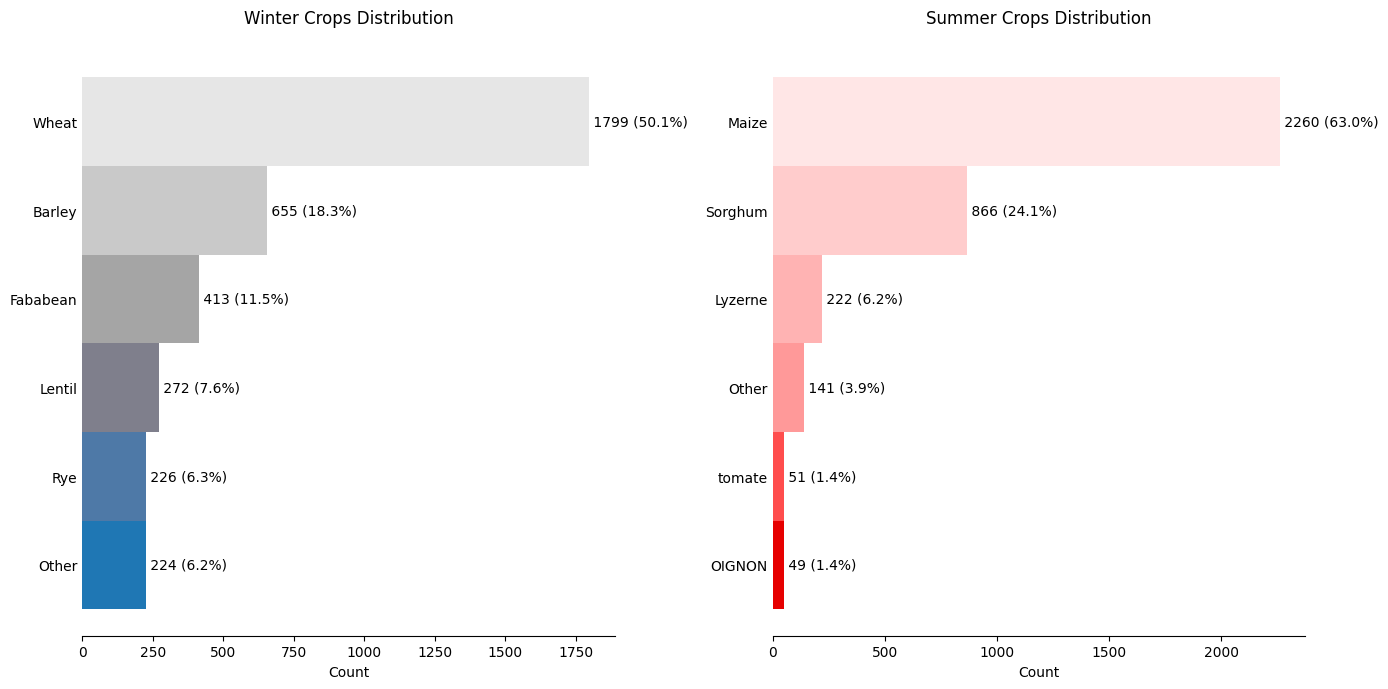

Winter crops distribution:
Wheat       1799
Barley       655
Fababean     413
Lentil       272
Rye          226
Other        224
dtype: int64

Summer crops distribution:
Maize      2260
Sorghum     866
Lyzerne     222
tomate       51
OIGNON       49
Other       141
dtype: int64


In [26]:
def plot_crop_distribution(df, wt_col='WT_CROP', sm_col='SM_CROP', top_n=5,
                          figsize=(12, 8), show_plot=True, save_path=None):
    """
    Plot crop distribution with no gaps between bars, percentage labels, and custom colors.

    Parameters:
    - df: DataFrame containing crop data
    - wt_col: Winter crop column name
    - sm_col: Summer crop column name
    - top_n: Number of top crops to show individually
    - figsize: Figure size
    - show_plot: Whether to display the plot
    - save_path: Path to save the plot image
    """
    # Prepare subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Color schemes
    blue_tones = ['#1f77b4', '#4e79a7', '#7f7f8c', '#a5a5a5', '#c9c9c9']
    red_tones = ['#e60000', '#ff4d4d', '#ff9999', '#ffb3b3', '#ffcccc']

    # Process Winter Crops (WT_CROP)
    wt_counts = df[wt_col].value_counts()
    wt_top = wt_counts.head(top_n)
    wt_other = wt_counts[top_n:].sum()

    if wt_other > 0:
        wt_top = pd.concat([wt_top, pd.Series({'Other': wt_other})])
        blue_tones.append('#e6e6e6')  # Light gray for Other

    wt_total = wt_top.sum()
    wt_percent = (wt_top / wt_total * 100).round(1)

    # Plot Winter Crops with no gaps
    bars1 = ax1.barh(range(len(wt_top)), wt_top.sort_values(),
                    height=1, color=blue_tones[:len(wt_top)], edgecolor='none')
    ax1.set_title('Winter Crops Distribution', pad=20)
    ax1.set_xlabel('Count')
    ax1.set_yticks(range(len(wt_top)))
    ax1.set_yticklabels(wt_top.sort_values().index)

    # Add percentage labels for Winter Crops
    for i, (val, perc) in enumerate(zip(wt_top.sort_values().values, wt_percent.sort_values().values)):
        ax1.text(val, i, f' {val} ({perc}%)', va='center', ha='left')

    # Process Summer Crops (SM_CROP)
    sm_counts = df[sm_col].value_counts()
    sm_top = sm_counts.head(top_n)
    sm_other = sm_counts[top_n:].sum()

    if sm_other > 0:
        sm_top = pd.concat([sm_top, pd.Series({'Other': sm_other})])
        red_tones.append('#ffe6e6')  # Light red for Other

    sm_total = sm_top.sum()
    sm_percent = (sm_top / sm_total * 100).round(1)

    # Plot Summer Crops with no gaps
    bars2 = ax2.barh(range(len(sm_top)), sm_top.sort_values(),
                    height=1, color=red_tones[:len(sm_top)], edgecolor='none')
    ax2.set_title('Summer Crops Distribution', pad=20)
    ax2.set_xlabel('Count')
    ax2.set_yticks(range(len(sm_top)))
    ax2.set_yticklabels(sm_top.sort_values().index)

    # Add percentage labels for Summer Crops
    for i, (val, perc) in enumerate(zip(sm_top.sort_values().values, sm_percent.sort_values().values)):
        ax2.text(val, i, f' {val} ({perc}%)', va='center', ha='left')

    # Remove spines and ticks for cleaner look
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='y', which='both', length=0)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    if show_plot:
        plt.show()
    plt.close()

    return {'Winter_Crops': wt_top, 'Summer_Crops': sm_top}


# Generate plots
results = plot_crop_distribution(
    df,
    wt_col='WT_CROP',
    sm_col='SM_CROP',
    top_n=5,
    figsize=(14, 7),
    save_path='crop_distribution.png'
)

# Access the results if needed
print("Winter crops distribution:")
print(results['Winter_Crops'])
print("\nSummer crops distribution:")
print(results['Summer_Crops'])

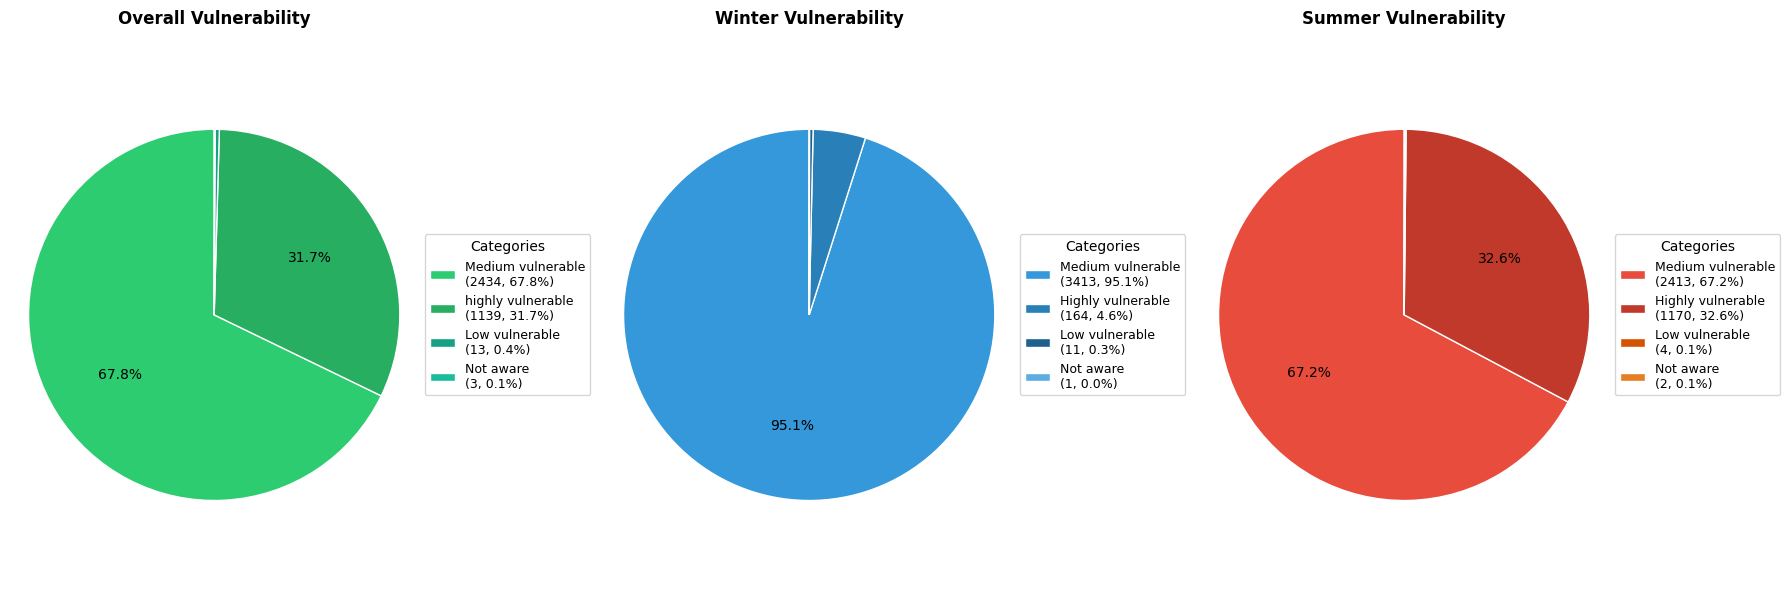

In [27]:

def plot_column_pie_charts(df, columns, pie_titles=None, figsize=(15, 5)):
    """
    Creates pie charts showing distribution for three different columns in a DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of three column names to visualize
    - pie_titles: List of three custom titles for the pie charts (optional)
    - figsize: Size of the figure (width, height)
    """
    if len(columns) != 3:
        raise ValueError("Please provide exactly three column names")

    # Set default titles if not provided
    if pie_titles is None:
        pie_titles = columns
    elif len(pie_titles) != 3:
        raise ValueError("Please provide exactly three pie titles")

    # Set up the figure
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    color_schemes = [
        ['#2ecc71', '#27ae60', '#16a085', '#1abc9c'],  # Greens
        ['#3498db', '#2980b9', '#1f618d', '#5dade2'],  # Blues
        ['#e74c3c', '#c0392b', '#d35400', '#e67e22']   # Reds
    ]

    for i, (ax, col, colors) in enumerate(zip(axes, columns, color_schemes)):
        # Get value counts for the column
        counts = df[col].value_counts()

        # Calculate percentages
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Create pie chart
        wedges, texts, autotexts = ax.pie(
            counts,
            colors=colors[:len(counts)],  # Use only needed colors
            autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',  # Only show % if >=5%
            startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            textprops={'fontsize': 10}
        )

        # Set custom title
        ax.set_title(pie_titles[i], pad=20, fontsize=12, fontweight='bold')

        # Equal aspect ratio ensures pie is drawn as circle
        ax.axis('equal')

        # Add enhanced legend
        legend_labels = [f'{name}\n({val}, {pct}%)'
                        for name, val, pct in zip(counts.index, counts, percentages)]

        ax.legend(
            wedges,
            legend_labels,
            title="Categories",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1),
            fontsize=9,
            title_fontsize=10
        )

    plt.tight_layout()
    plt.show()

# Example usage:
# Plot with custom titles
plot_column_pie_charts(
    df,
    columns=['CA_CC_VUL', 'WT_VL_CC', 'SM_VL_CC'],
    pie_titles=['Overall Vulnerability', 'Winter Vulnerability', 'Summer Vulnerability'],
    figsize=(18, 6)
)